In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('seaborn')
import warnings
from IPython.display import display
warnings.filterwarnings("ignore")

In [2]:
df_1 = pd.read_csv('Shoe-Sales.csv',parse_dates=True,squeeze=True,index_col=0)
df_1.head()

YearMonth
1980-01-01     85
1980-02-01     89
1980-03-01    109
1980-04-01     95
1980-05-01     91
Name: Shoe_Sales, dtype: int64

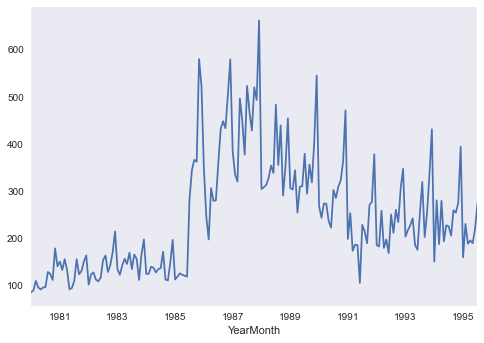

In [3]:
df_1.plot();
plt.grid()

In [4]:
df_1.dropna(inplace=True)

In [5]:
df_1.isnull().sum()

0

In [6]:
df_1.describe()

count    187.000000
mean     245.636364
std      121.390804
min       85.000000
25%      143.500000
50%      220.000000
75%      315.500000
max      662.000000
Name: Shoe_Sales, dtype: float64

In [7]:
df_shoe = pd.read_csv("Shoe-Sales.csv")

In [8]:
df_shoe.head(10)

YearMonth  Shoe_Sales
0   1980-01          85
1   1980-02          89
2   1980-03         109
3   1980-04          95
4   1980-05          91
5   1980-06          95
6   1980-07          96
7   1980-08         128
8   1980-09         124
9   1980-10         111

In [9]:
df_shoe.shape

(187, 2)

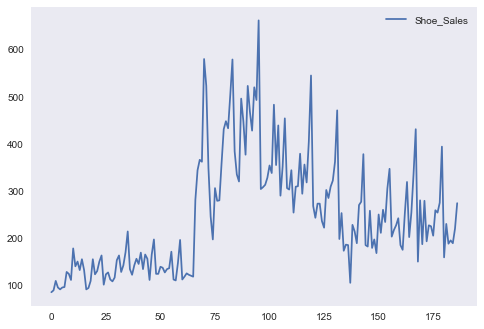

In [10]:
df_shoe.plot();
plt.grid()

In [11]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [12]:
df_shoe['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_shoe.head()

YearMonth  Shoe_Sales Time_Stamp
0   1980-01          85 1980-01-31
1   1980-02          89 1980-02-29
2   1980-03         109 1980-03-31
3   1980-04          95 1980-04-30
4   1980-05          91 1980-05-31

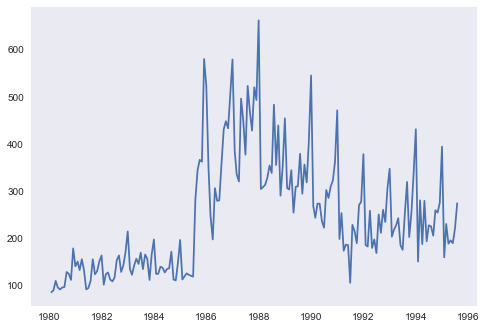

In [13]:
plt.plot(df_shoe['Time_Stamp'],df_shoe['Shoe_Sales']);
plt.grid()

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [14]:
df_shoe.isnull().sum()

YearMonth     0
Shoe_Sales    0
Time_Stamp    0
dtype: int64

In [15]:
#imputing null values with median
for column in df_shoe.columns:
    if df_shoe[column].dtype != 'object':
        median = df_shoe[column].median()
        df_shoe[column] = df_shoe[column].fillna(median)   

In [16]:
df_shoe.isnull().sum()

YearMonth     0
Shoe_Sales    0
Time_Stamp    0
dtype: int64

In [17]:
df_shoe.describe()

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

Text(0, 0.5, 'Units Sold')

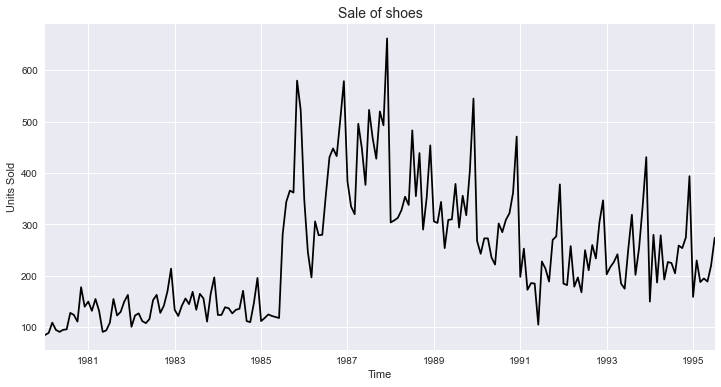

In [18]:
plt.figure(figsize = (12, 6))
df_1.plot(color='Black')
plt.title('Sale of shoes', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Units Sold')

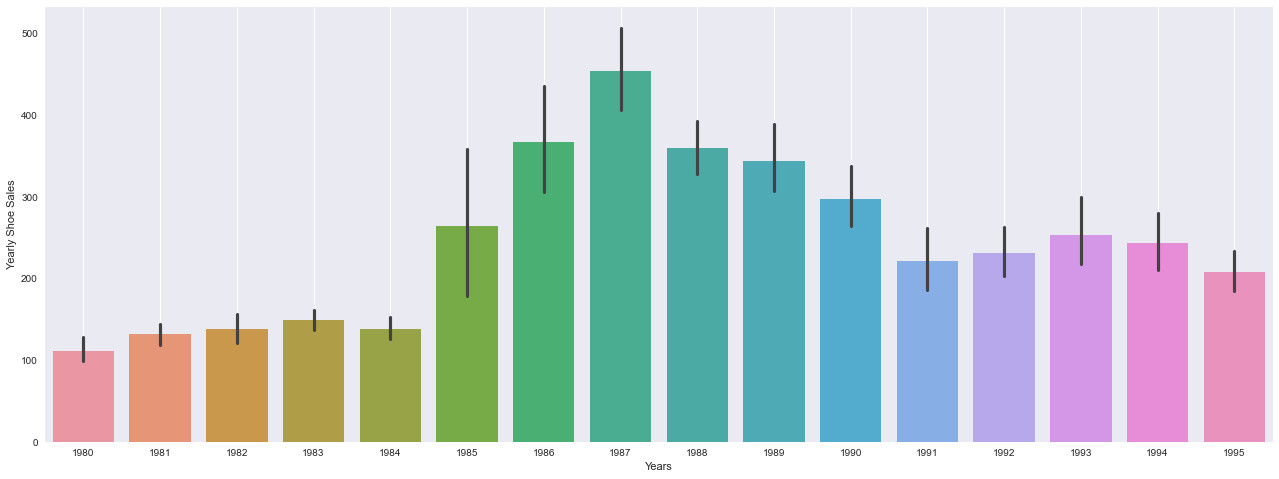

In [19]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(df_1.index.year, df_1, ax=ax)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Shoe Sales');

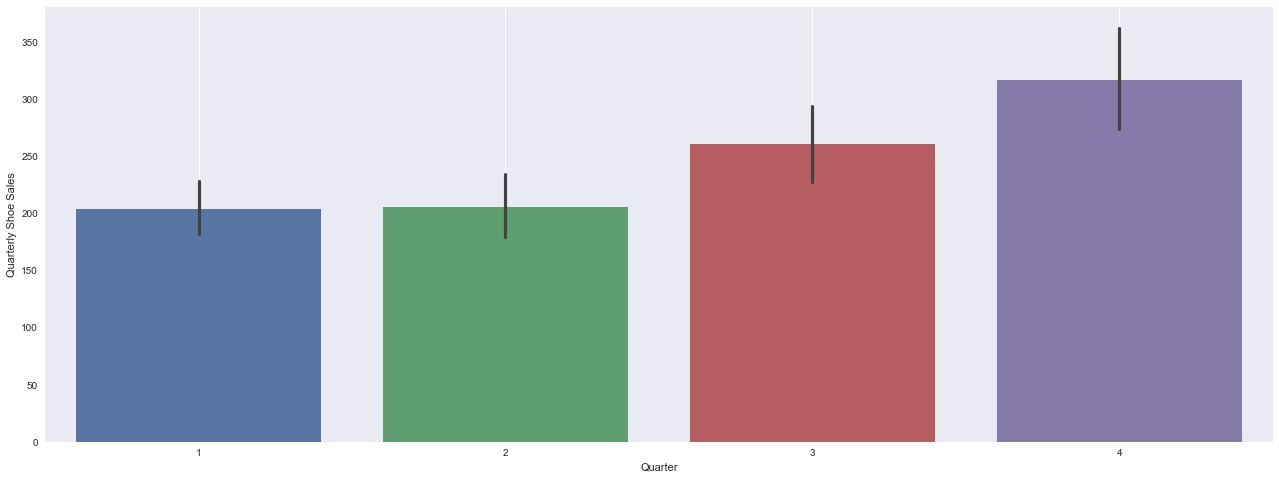

In [20]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(df_1.index.quarter, df_1, ax=ax)
plt.grid();
plt.xlabel('Quarter');
plt.ylabel('Quarterly Shoe Sales');

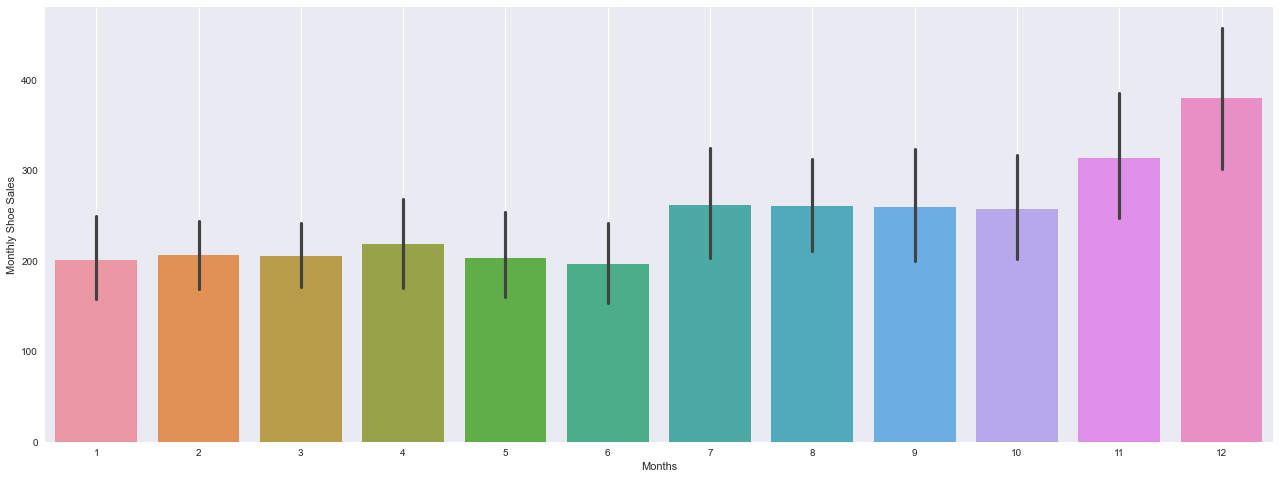

In [21]:
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(df_1.index.month, df_1, ax=ax)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Shoe Sales');

In [22]:
df_shoe.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_shoe.head()

YearMonth  Shoe_Sales
Time_Stamp                      
1980-01-31   1980-01          85
1980-02-29   1980-02          89
1980-03-31   1980-03         109
1980-04-30   1980-04          95
1980-05-31   1980-05          91

In [23]:
df_shoe.drop(labels='YearMonth',inplace=True,axis=1)
df_shoe.head()

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

In [24]:
df_shoe['Shoe_Sales']

Time_Stamp
1980-01-31     85
1980-02-29     89
1980-03-31    109
1980-04-30     95
1980-05-31     91
             ... 
1995-03-31    188
1995-04-30    195
1995-05-31    189
1995-06-30    220
1995-07-31    274
Name: Shoe_Sales, Length: 187, dtype: int64

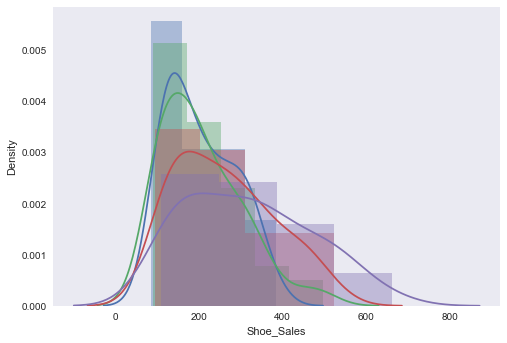

In [25]:
sns.distplot(df_1.loc[df_1.index.quarter == 1])
sns.distplot(df_1.loc[df_1.index.quarter == 2])
sns.distplot(df_1.loc[df_1.index.quarter == 3])
sns.distplot(df_1.loc[df_1.index.quarter == 4])
plt.grid();

In [26]:
yearly_sales_across_months = pd.pivot_table(df_shoe, values = 'Shoe_Sales', columns = df_shoe.index.month, 
                                        index = df_shoe.index.year)

yearly_sales_across_months

Time_Stamp     1      2      3      4      5      6      7      8      9   \
Time_Stamp                                                                  
1980         85.0   89.0  109.0   95.0   91.0   95.0   96.0  128.0  124.0   
1981        150.0  132.0  155.0  132.0   91.0   94.0  109.0  155.0  123.0   
1982        101.0  123.0  127.0  112.0  108.0  116.0  153.0  163.0  128.0   
1983        134.0  122.0  142.0  156.0  145.0  169.0  134.0  165.0  156.0   
1984        124.0  124.0  139.0  137.0  127.0  134.0  136.0  171.0  112.0   
1985        112.0  118.0  125.0  122.0  120.0  118.0  281.0  344.0  366.0   
1986        348.0  246.0  197.0  306.0  279.0  280.0  358.0  431.0  448.0   
1987        384.0  335.0  320.0  496.0  448.0  377.0  523.0  468.0  428.0   
1988        304.0  308.0  313.0  328.0  354.0  338.0  483.0  355.0  439.0   
1989        306.0  303.0  344.0  254.0  309.0  310.0  379.0  294.0  356.0   
1990        268.0  243.0  273.0  273.0  236.0  222.0  302.0  285.0  309.0   
1991        198.0  253.0  173.0  186.0  185.0  105.0  228.0  214.0  189.0   
1992        185.0  182.0  258.0  179.0  197.0  168.0  250.0  211.0  260.0   
1993        203.0  217.0  227.0  242.0  185.0  175.0  252.0  319.0  202.0   
1994        150.0  280.0  187.0  279.0  193.0  227.0  225.0  205.0  259.0   
1995        159.0  230.0  188.0  195.0  189.0  220.0  274.0    NaN    NaN   

Time_Stamp     10     11     12  
Time_Stamp                       
1980        111.0  178.0  140.0  
1981        130.0  150.0  163.0  
1982        142.0  170.0  214.0  
1983        111.0  165.0  197.0  
1984        110.0  147.0  196.0  
1985        362.0  580.0  523.0  
1986        433.0  504.0  579.0  
1987        520.0  493.0  662.0  
1988        290.0  352.0  454.0  
1989        318.0  405.0  545.0  
1990        322.0  362.0  471.0  
1991        270.0  277.0  378.0  
1992        234.0  305.0  347.0  
1993        254.0  336.0  431.0  
1994        254.0  275.0  394.0  
1995          NaN    NaN    NaN

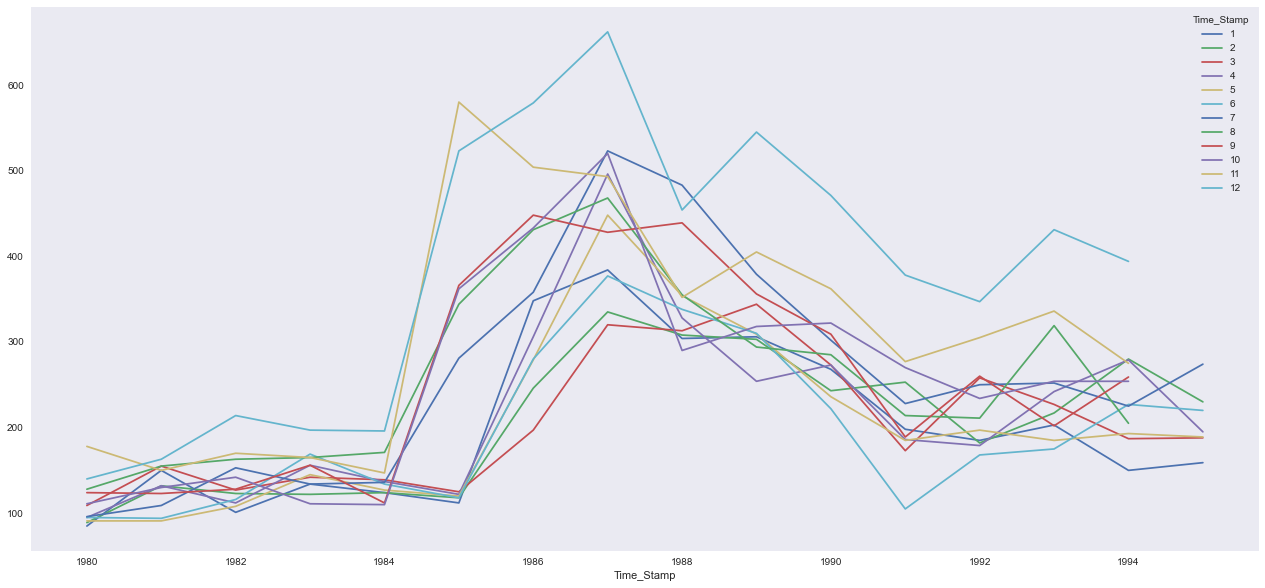

In [27]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

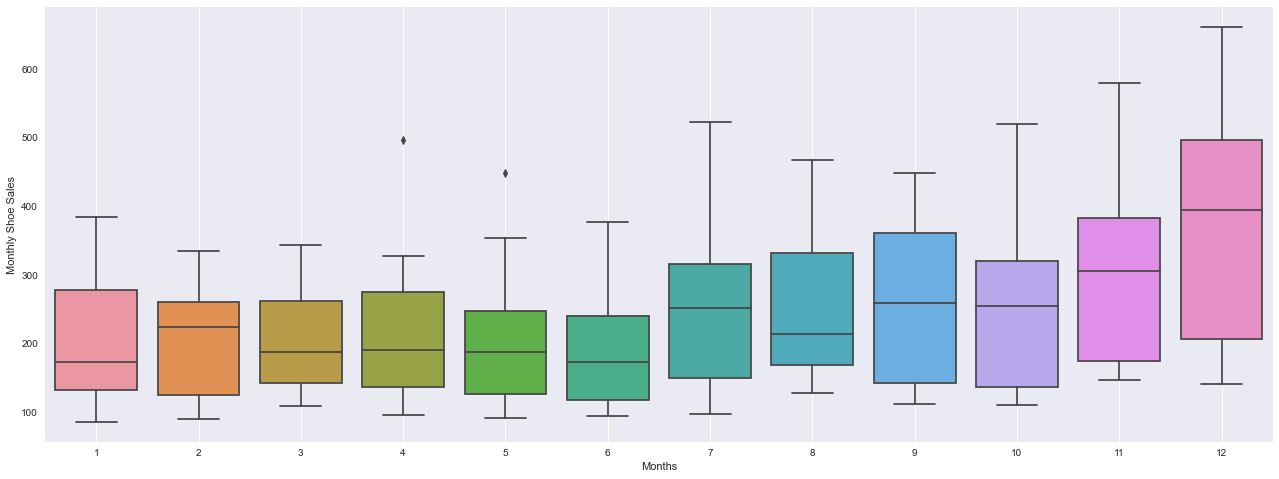

In [28]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Shoe Sales');

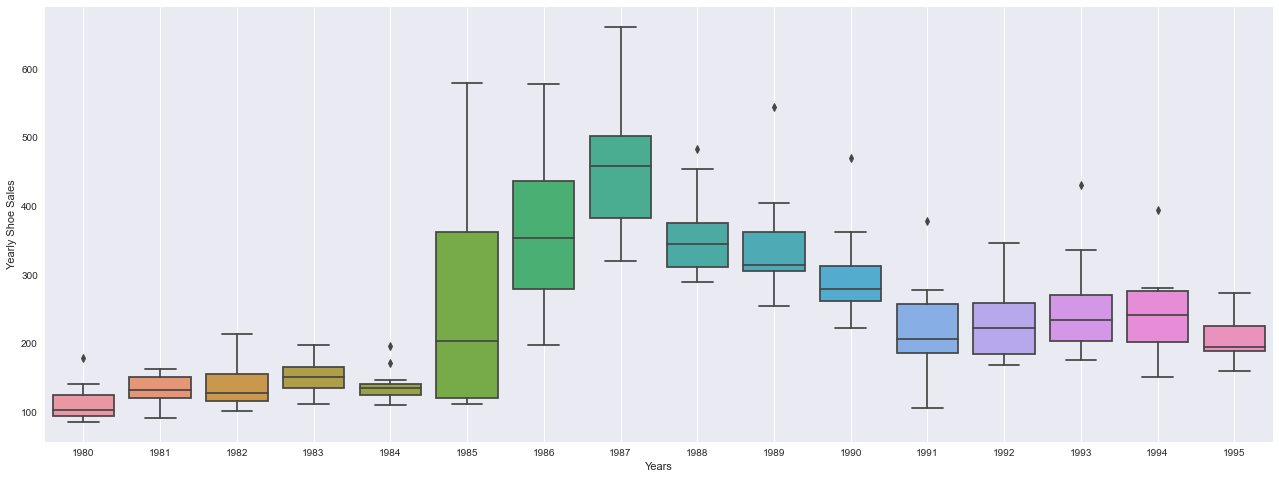

In [29]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Shoe Sales');

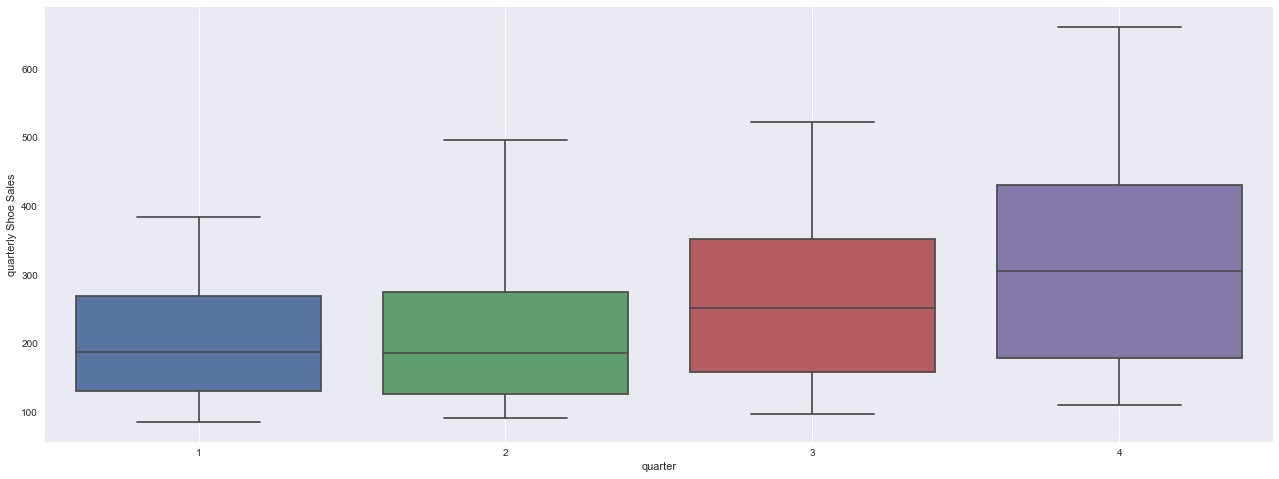

In [30]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.quarter, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('quarter');
plt.ylabel('quarterly Shoe Sales');

In [31]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head(10)

YearMonth
1980-12-31    1341
1981-12-31    1584
1982-12-31    1657
1983-12-31    1796
1984-12-31    1657
1985-12-31    3171
1986-12-31    4409
1987-12-31    5454
1988-12-31    4318
1989-12-31    4123
Freq: A-DEC, Name: Shoe_Sales, dtype: int64

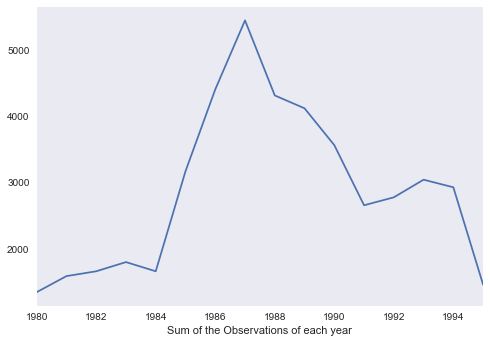

In [32]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [33]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    111.750000
1981-12-31    132.000000
1982-12-31    138.083333
1983-12-31    149.666667
1984-12-31    138.083333
Freq: A-DEC, Name: Shoe_Sales, dtype: float64

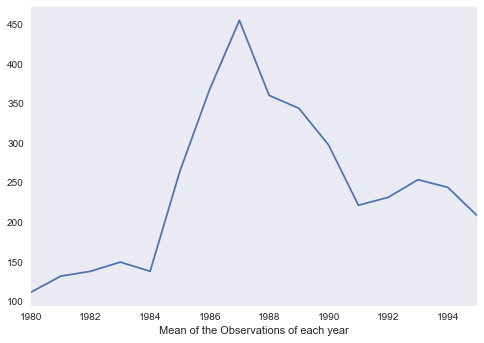

In [34]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

(a) Quarterly plot

In [35]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31    283
1980-06-30    281
1980-09-30    348
1980-12-31    429
1981-03-31    437
Freq: Q-DEC, Name: Shoe_Sales, dtype: int64

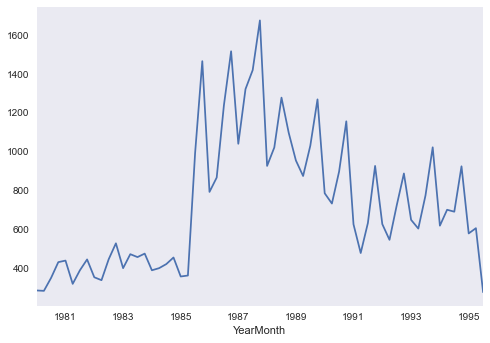

In [36]:
df_quarterly_sum.plot();
plt.grid()

In [37]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31     94.333333
1980-06-30     93.666667
1980-09-30    116.000000
1980-12-31    143.000000
1981-03-31    145.666667
Freq: Q-DEC, Name: Shoe_Sales, dtype: float64

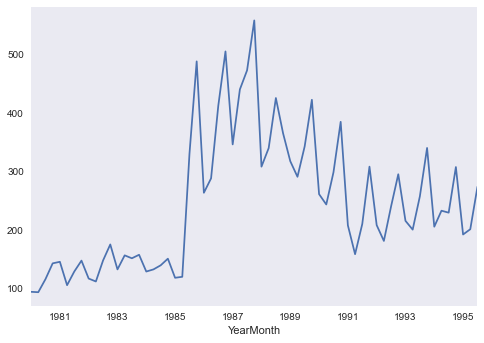

In [38]:
df_quarterly_mean.plot();
plt.grid()

(b) daily plot

In [39]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01     85
1980-01-02      0
1980-01-03      0
1980-01-04      0
1980-01-05      0
             ... 
1995-06-27      0
1995-06-28      0
1995-06-29      0
1995-06-30      0
1995-07-01    274
Freq: D, Name: Shoe_Sales, Length: 5661, dtype: int64

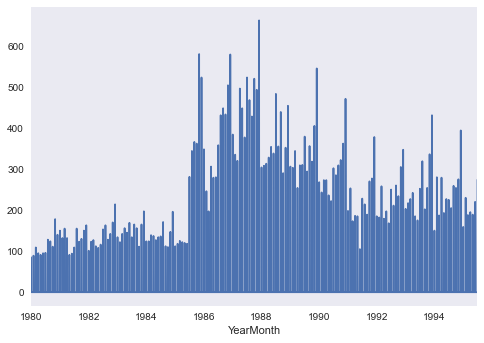

In [40]:
df_daily_sum.plot()
plt.grid();

(C) decade plot

In [41]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     1341
1990-12-31    31735
2000-12-31    12858
Freq: 10A-DEC, Name: Shoe_Sales, dtype: int64

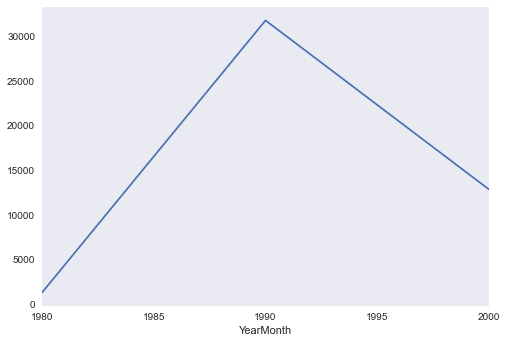

In [42]:
df_decade_sum.plot();
plt.grid()

# Decomposing the Time Series

In [43]:
from statsmodels.tsa.seasonal import   seasonal_decompose

(a) Additive Plot

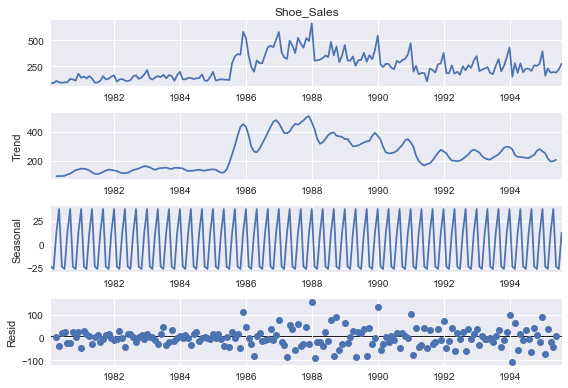

In [44]:
decomposition = seasonal_decompose(df_shoe['Shoe_Sales'],model='additive', freq=4)
decomposition.plot();

In [45]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31        NaN
1980-02-29        NaN
1980-03-31     95.250
1980-04-30     96.750
1980-05-31     95.875
1980-06-30     98.375
1980-07-31    106.625
1980-08-31    112.750
1980-09-30    125.000
1980-10-31    136.750
1980-11-30    141.500
1980-12-31    147.375
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -23.918841
1980-02-29   -26.469022
1980-03-31    12.371920
1980-04-30    38.015942
1980-05-31   -23.918841
1980-06-30   -26.469022
1980-07-31    12.371920
1980-08-31    38.015942
1980-09-30   -23.918841
1980-10-31   -26.469022
1980-11-30    12.371920
1980-12-31    38.015942
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31     1.378080
1980-04-30   -39.765942
1980-05-31    19.043841
1980-06-30    23.094022
1980-07-31   -22.996920
1980-08-31   -22.765942
1980-09-30    22.918841
1980-10-31     0.719022
1980-11-30    24.128080
1980-12-31   -45.390942
Name: resid, dtype: float64 



(b) Multiplicative Plot

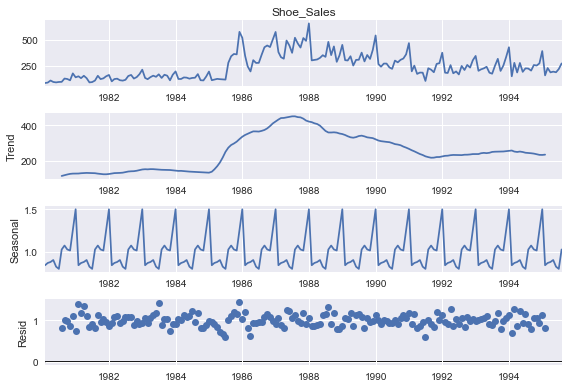

In [46]:
decomposition = seasonal_decompose(df_shoe['Shoe_Sales'],model='multiplicative')
decomposition.plot();

In [47]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    114.458333
1980-08-31    118.958333
1980-09-30    122.666667
1980-10-31    126.125000
1980-11-30    127.666667
1980-12-31    127.625000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.840405
1980-02-29    0.866682
1980-03-31    0.878675
1980-04-30    0.901826
1980-05-31    0.823141
1980-06-30    0.797254
1980-07-31    1.025527
1980-08-31    1.072445
1980-09-30    1.026307
1980-10-31    1.013557
1980-11-30    1.254223
1980-12-31    1.499958
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.817856
1980-08-31    1.003322
1980-09-30    0.984958
1980-10-31    0.868308
1980-11-30    1.111649
1980-12-31    0.731330
Name: resid, dtype:

In [48]:
detrend_ts = seasonality + residual

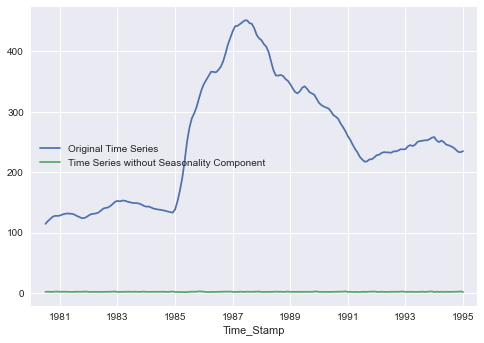

In [49]:
trend.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [50]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(10)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    115.276189
1980-08-31    119.961655
1980-09-30    123.651625
1980-10-31    126.993308
dtype: float64

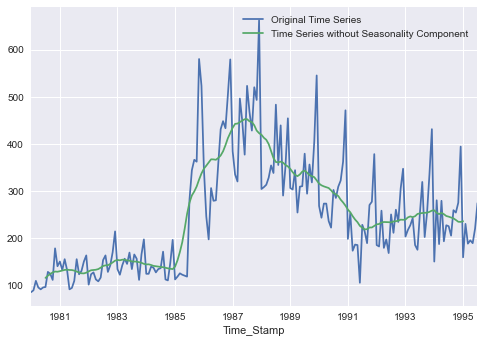

In [51]:
df_shoe.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

# 3. Split the data into training and test. The test data should start in 1991.

In [52]:
train = df_shoe[df_shoe.index.year < 1991]
test = df_shoe[df_shoe.index.year >= 1991]

In [53]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [54]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

Last few rows of Training Data


Shoe_Sales
Time_Stamp            
1990-08-31         285
1990-09-30         309
1990-10-31         322
1990-11-30         362
1990-12-31         471

First few rows of Test Data


Shoe_Sales
Time_Stamp            
1991-01-31         198
1991-02-28         253
1991-03-31         173
1991-04-30         186
1991-05-31         185

Last few rows of Test Data


Shoe_Sales
Time_Stamp            
1995-03-31         188
1995-04-30         195
1995-05-31         189
1995-06-30         220
1995-07-31         274

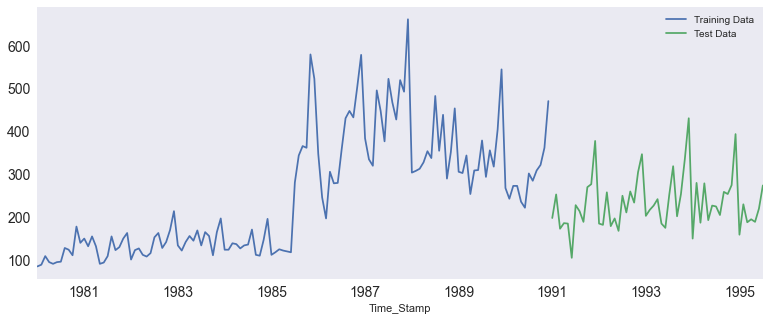

In [55]:
train['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
test['Shoe_Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

(a) Model 1: Linear Regression

In [56]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [57]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [58]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1980-01-31          85     1
1980-02-29          89     2
1980-03-31         109     3
1980-04-30          95     4
1980-05-31          91     5 

Last few rows of Training Data 
             Shoe_Sales  time
Time_Stamp                  
1990-08-31         285   128
1990-09-30         309   129
1990-10-31         322   130
1990-11-30         362   131
1990-12-31         471   132 

First few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1991-01-31         198   133
1991-02-28         253   134
1991-03-31         173   135
1991-04-30         186   136
1991-05-31         185   137 

Last few rows of Test Data 
             Shoe_Sales  time
Time_Stamp                  
1995-03-31         188   183
1995-04-30         195   184
1995-05-31         189   185
1995-06-30         220   186
1995-07-31         274   187 



In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Shoe_Sales'].values)

LinearRegression()

In [62]:
LinearRegression_train['RegOnTime_shoe'] = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_shoe'] = lr.predict(LinearRegression_test[['time']])

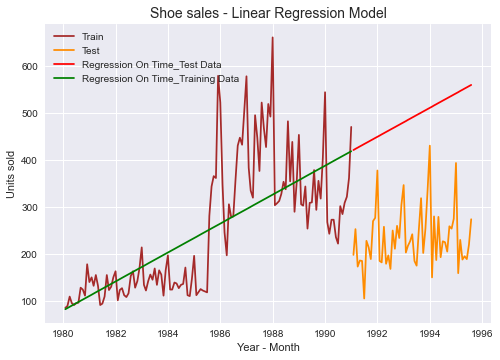

In [63]:
plt.plot( train['Shoe_Sales'], label='Train', color = 'brown')
plt.plot(test['Shoe_Sales'], label='Test', color = 'darkorange')
plt.plot(LinearRegression_test['RegOnTime_shoe'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_shoe'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Shoe sales - Linear Regression Model', fontsize = 14);

a1) Model Evaluvation - Test Data

In [64]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [65]:
## Shoe Testing Data - RMSE and MAPE

rmse_shoe_model1_test = metrics.mean_squared_error(test['Shoe_Sales'],LinearRegression_test['RegOnTime_shoe'],squared=False)
mape_shoe_model1_test = MAPE(test['Shoe_Sales'],LinearRegression_test['RegOnTime_shoe'])
print("For RegressionOnTime forecast on the Shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model1_test, mape_shoe_model1_test))

For RegressionOnTime forecast on the Shoe Testing Data:  RMSE is 266.276 and MAPE is 110.08


In [66]:
## Shoe Training Data - RMSE and MAPE

rmse_shoe_model1_train = metrics.mean_squared_error(train['Shoe_Sales'],LinearRegression_train['RegOnTime_shoe'],squared=False)
mape_shoe_model1_train = MAPE(train['Shoe_Sales'],LinearRegression_train['RegOnTime_shoe'])
print("For RegressionOnTime forecast on the Shoe Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model1_train, mape_shoe_model1_train))

For RegressionOnTime forecast on the Shoe Training Data:  RMSE is 97.380 and MAPE is 28.50


In [67]:
shoe_resultsDf = pd.DataFrame({'Test RMSE': [rmse_shoe_model1_test],'Test MAPE': [mape_shoe_model1_test]},index=['RegressionOnTime'])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  266.276472     110.08

(b) Model 2: Naive forecast

In [68]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [69]:
NaiveModel_train['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    471
1980-02-29    471
1980-03-31    471
1980-04-30    471
1980-05-31    471
Name: naive, dtype: int64

In [70]:
NaiveModel_test['naive'] = np.asarray(train['Shoe_Sales'])[len(np.asarray(train['Shoe_Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    471
1991-02-28    471
1991-03-31    471
1991-04-30    471
1991-05-31    471
Name: naive, dtype: int64

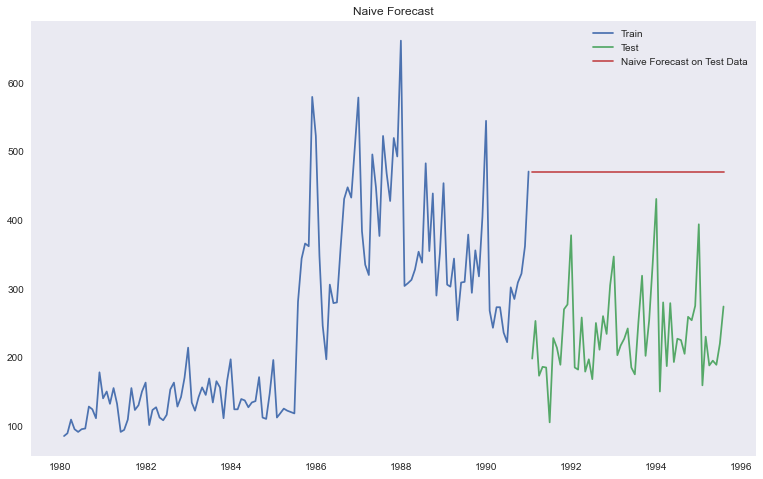

In [71]:
plt.figure(figsize=(13,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train')
plt.plot(test['Shoe_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Text(0.5, 1.0, 'Shoe - Naive Forecast')

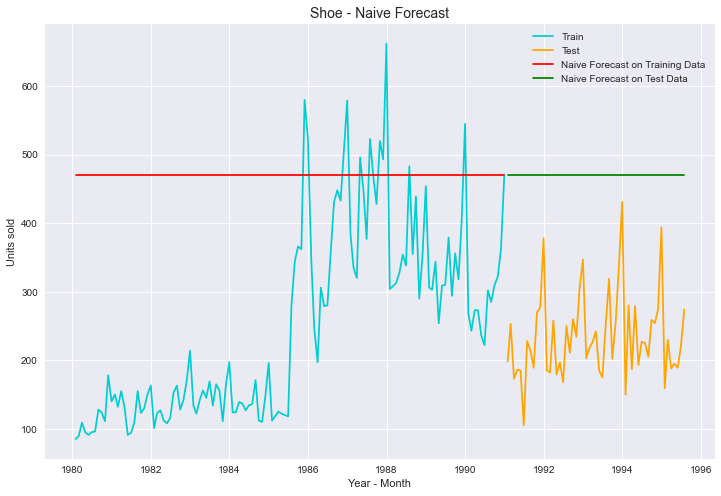

In [72]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Shoe_Sales'], label='Train', color = 'darkturquoise')
plt.plot(test['Shoe_Sales'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Shoe - Naive Forecast", fontsize = 14)

b1) Model Evauation - Test Data

In [73]:
## Shoe Testing Data - RMSE and MAPE

rmse_shoe_model2_test = metrics.mean_squared_error(test['Shoe_Sales'],NaiveModel_test['naive'],squared=False)
mape_shoe_model2_test = MAPE(test['Shoe_Sales'],NaiveModel_test['naive'])
print("For Naive forecast on the Shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model2_test, mape_shoe_model2_test))

For Naive forecast on the Shoe Testing Data:  RMSE is 245.121 and MAPE is 101.47


In [74]:
## Shoe Training Data - RMSE and MAPE

rmse_shoe_model2_train = metrics.mean_squared_error(train['Shoe_Sales'],NaiveModel_train['naive'],squared=False)
mape_shoe_model2_train = MAPE(train['Shoe_Sales'],NaiveModel_train['naive'])
print("For Naive forecast on the Shoe Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model2_train, mape_shoe_model2_train))

For Naive forecast on the Shoe Training Data:  RMSE is 260.153 and MAPE is 92.36


In [75]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_shoe_model2_test],'Test MAPE': [mape_shoe_model2_test]},index=['NaiveModel'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_2])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  266.276472     110.08
NaiveModel        245.121306     101.47

(C) Model 3: Simple Average

In [76]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [77]:
SimpleAverage_train['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_train['mean_forecast'].head()

Time_Stamp
1980-01-31    250.575758
1980-02-29    250.575758
1980-03-31    250.575758
1980-04-30    250.575758
1980-05-31    250.575758
Name: mean_forecast, dtype: float64

In [78]:
SimpleAverage_test['mean_forecast'] = train['Shoe_Sales'].mean()
SimpleAverage_test.head()

Shoe_Sales  mean_forecast
Time_Stamp                           
1991-01-31         198     250.575758
1991-02-28         253     250.575758
1991-03-31         173     250.575758
1991-04-30         186     250.575758
1991-05-31         185     250.575758

Text(0.5, 1.0, 'Shoe - SimpleAverage Forecast')

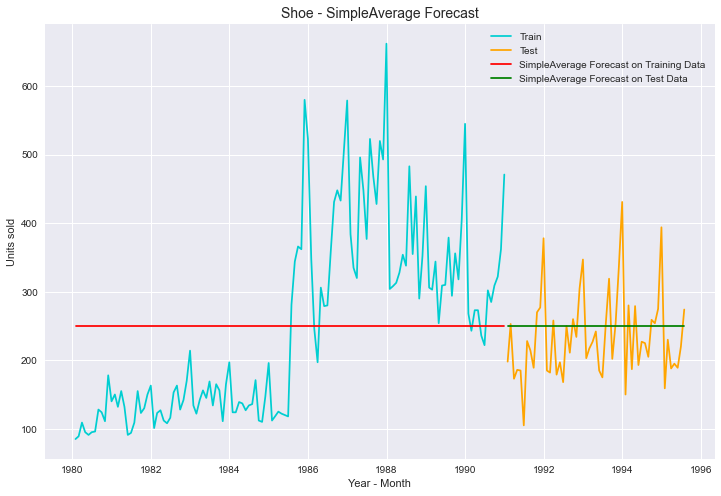

In [79]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Shoe_Sales'], label='Train', color = 'darkturquoise')
plt.plot(test['Shoe_Sales'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['mean_forecast'], label='SimpleAverage Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['mean_forecast'], label='SimpleAverage Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title("Shoe - SimpleAverage Forecast", fontsize=14)

C1) Model Evaluvation - Test Data

In [80]:
rmse_shoe_model3_test = metrics.mean_squared_error(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
mape_shoe_model3_test = MAPE(test['Shoe_Sales'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model3_test, mape_shoe_model3_test))

For Simple Average forecast on the Shoe Testing Data:  RMSE is 63.985 and MAPE is 21.86


In [81]:
rmse_shoe_model3_train = metrics.mean_squared_error(train['Shoe_Sales'],SimpleAverage_train['mean_forecast'],squared=False)
mape_shoe_model3_train = MAPE(train['Shoe_Sales'],SimpleAverage_train['mean_forecast'])
print("For Simple Average forecast on the Shoe Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model3_train, mape_shoe_model3_train))

For Simple Average forecast on the Shoe Training Data:  RMSE is 138.176 and MAPE is 47.75


In [82]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_shoe_model3_test],'Test MAPE': [mape_shoe_model3_test]},index=['SimpleAverage'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_2])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  266.276472     110.08
NaiveModel        245.121306     101.47
SimpleAverage      63.984570      21.86

(d) Method 4: Moving Average(MA)

In [83]:
MovingAverage = df_shoe.copy()
MovingAverage.head()

Shoe_Sales
Time_Stamp            
1980-01-31          85
1980-02-29          89
1980-03-31         109
1980-04-30          95
1980-05-31          91

In [84]:
MovingAverage['shoe_Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(2).mean()
MovingAverage['shoe_Trailing_4'] = MovingAverage['Shoe_Sales'].rolling(4).mean()
MovingAverage['shoe_Trailing_6'] = MovingAverage['Shoe_Sales'].rolling(6).mean()
MovingAverage['shoe_Trailing_9'] = MovingAverage['Shoe_Sales'].rolling(9).mean()

In [85]:
MovingAverage.head()

Shoe_Sales  shoe_Trailing_2  shoe_Trailing_4  shoe_Trailing_6  \
Time_Stamp                                                                  
1980-01-31          85              NaN              NaN              NaN   
1980-02-29          89             87.0              NaN              NaN   
1980-03-31         109             99.0              NaN              NaN   
1980-04-30          95            102.0             94.5              NaN   
1980-05-31          91             93.0             96.0              NaN   

            shoe_Trailing_9  
Time_Stamp                   
1980-01-31              NaN  
1980-02-29              NaN  
1980-03-31              NaN  
1980-04-30              NaN  
1980-05-31              NaN

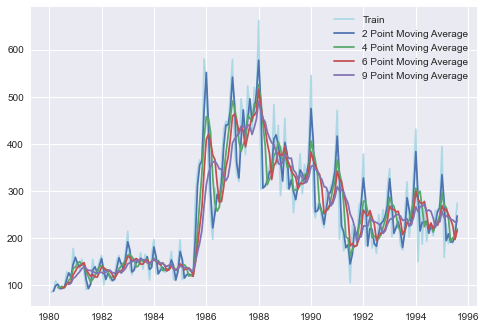

In [86]:
plt.plot(MovingAverage['Shoe_Sales'], label='Train', color='lightblue')
plt.plot(MovingAverage['shoe_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['shoe_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['shoe_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['shoe_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')

In [87]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Shoe - Trailing Moving Average Forecast')

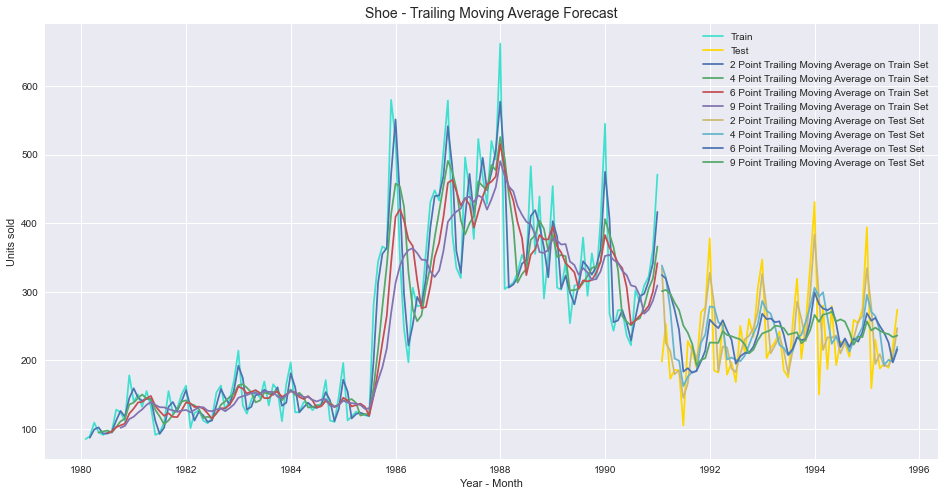

In [88]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Shoe_Sales'], label='Train', color = 'turquoise')
plt.plot(trailing_MovingAverage_test['Shoe_Sales'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['shoe_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['shoe_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['shoe_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['shoe_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['shoe_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['shoe_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['shoe_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['shoe_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')

plt.title("Shoe - Trailing Moving Average Forecast", fontsize=14)

d1) Model Evaluvation - Test Data

In [89]:
## Test Data - rmse_shoe and mape_shoe --> 2 point shoe_Trailing MA

rmse_shoe_model4_test_2 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_2'],squared=False)
mape_shoe_model4_test_2 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Testing Data,  rmse_shoe is %3.3f mape_shoe is %3.2f" %(rmse_shoe_model4_test_2, mape_shoe_model4_test_2))

## Test Data - rmse_shoe and mape_shoe --> 4 point shoe_Trailing MA

rmse_shoe_model4_test_4 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_4'],squared=False)
mape_shoe_model4_test_4 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Testing Data,  rmse_shoe is %3.3f mape_shoe is %3.2f" %(rmse_shoe_model4_test_4, mape_shoe_model4_test_4))

## Test Data - rmse_shoe and mape_shoe --> 6 point shoe_Trailing MA

rmse_shoe_model4_test_6 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_6'],squared=False)
mape_shoe_model4_test_6 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Testing Data,  rmse_shoe is %3.3f mape_shoe is %3.2f" %(rmse_shoe_model4_test_6, mape_shoe_model4_test_6))

## Test Data - rmse_shoe and mape_shoe --> 9 point shoe_Trailing MA

rmse_shoe_model4_test_9 = metrics.mean_squared_error(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_9'],squared=False)
mape_shoe_model4_test_9 = MAPE(test['Shoe_Sales'],trailing_MovingAverage_test['shoe_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Testing Data,  rmse_shoe is %3.3f mape_shoe is %3.2f" %(rmse_shoe_model4_test_9, mape_shoe_model4_test_9))


For 2 point Moving Average Model forecast on the Testing Data,  rmse_shoe is 45.949 mape_shoe is 14.32
For 4 point Moving Average Model forecast on the Testing Data,  rmse_shoe is 57.873 mape_shoe is 19.48
For 6 point Moving Average Model forecast on the Testing Data,  rmse_shoe is 63.457 mape_shoe is 22.38
For 9 point Moving Average Model forecast on the Testing Data,  rmse_shoe is 67.724 mape_shoe is 23.33


In [90]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_shoe_model4_test_2,rmse_shoe_model4_test_4
                                          ,rmse_shoe_model4_test_6,rmse_shoe_model4_test_9]
                            ,'Test MAPE': [mape_shoe_model4_test_2,mape_shoe_model4_test_4,
                                           mape_shoe_model4_test_6,mape_shoe_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_4])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  266.276472     110.08
NaiveModel        245.121306     101.47
SimpleAverage      63.984570      21.86
2 point TMA        45.948736      14.32
4 point TMA        57.872686      19.48
6 point TMA        63.456893      22.38
9 point TMA        67.723648      23.33

(E) Model 5: Simple Exponential Smoothing

In [91]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [92]:
SES_train = train.copy()
SES_test = test.copy()

In [93]:
SES_train['Shoe_Sales'].head()

Time_Stamp
1980-01-31     85
1980-02-29     89
1980-03-31    109
1980-04-30     95
1980-05-31     91
Name: Shoe_Sales, dtype: int64

In [94]:
model_shoe = SimpleExpSmoothing(SES_train['Shoe_Sales'])

Test: For alpha = 0.10,  RMSE is 115.8744 MAPE is 45.47
For smoothing level = 0.10,  Initial level 85.00


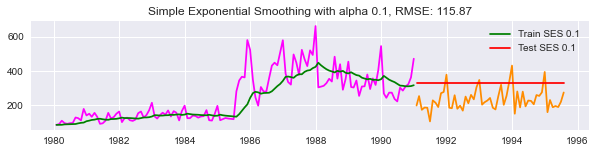

Test: For alpha = 0.20,  RMSE is 124.9768 MAPE is 49.28
For smoothing level = 0.20,  Initial level 85.00


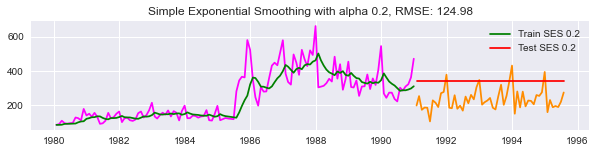

Test: For alpha = 0.30,  RMSE is 143.4003 MAPE is 57.13
For smoothing level = 0.30,  Initial level 85.00


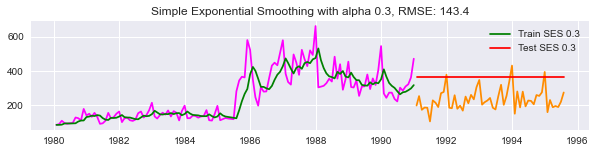

Test: For alpha = 0.50,  RMSE is 180.0725 MAPE is 72.79
For smoothing level = 0.50,  Initial level 85.00


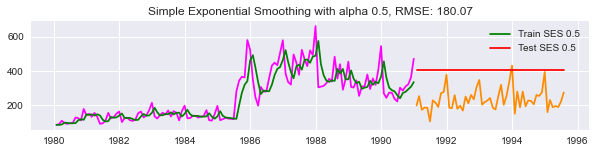

Test: For alpha = 0.99,  RMSE is 244.0627 MAPE is 101.00
For smoothing level = 0.99,  Initial level 85.00


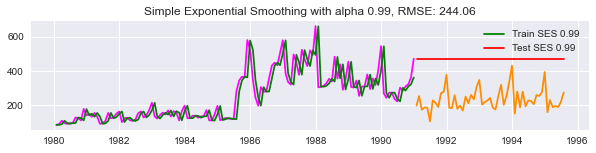

In [95]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_shoe.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Shoe_Sales']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Shoe_Sales'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Shoe_Sales'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Shoe_Sales'], color = 'magenta')
    plt.plot(test['Shoe_Sales'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [96]:
model_SES_autofit2 = model_shoe.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'smoothing_level': 0.6050493231648285,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.82865199255036,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
SES_train['predict_shoe'] = model_SES_autofit2.fittedvalues
SES_train.head()

Shoe_Sales  predict_shoe
Time_Stamp                          
1980-01-31          85     88.828652
1980-02-29          89     86.512129
1980-03-31         109     88.017414
1980-04-30          95    100.712913
1980-05-31          91     97.256319

In [98]:
SES_test['predict_shoe'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Shoe_Sales  predict_shoe
Time_Stamp                          
1991-01-31         198    420.229872
1991-02-28         253    420.229872
1991-03-31         173    420.229872
1991-04-30         186    420.229872
1991-05-31         185    420.229872

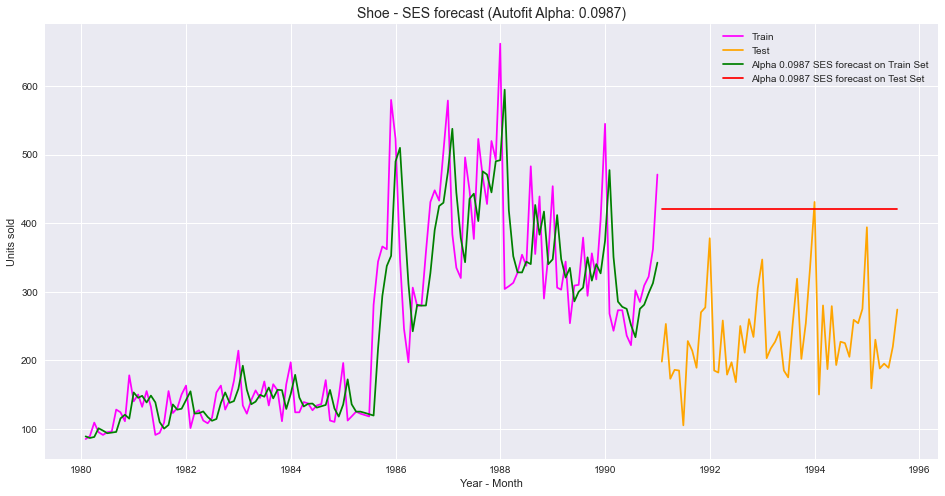

In [99]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(SES_test['Shoe_Sales'], label='Test', color = 'orange')

plt.plot(SES_train['predict_shoe'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_shoe'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Shoe - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

E1) Model Evaluation - Test Data

In [100]:
rmse_shoe_model5_test = metrics.mean_squared_error(test['Shoe_Sales'],SES_test['predict_shoe'],squared=False)
mape_shoe_model5_test = MAPE(test['Shoe_Sales'],SES_test['predict_shoe'])
print("For SES forecast on the Shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model5_test, mape_shoe_model5_test))

For SES forecast on the Shoe Testing Data:  RMSE is 196.405 and MAPE is 79.92


In [101]:
rmse_shoe_model5_train = metrics.mean_squared_error(train['Shoe_Sales'],SES_train['predict_shoe'],squared=False)
mape_shoe_model5_train = MAPE(train['Shoe_Sales'],SES_train['predict_shoe'])
print("For SES forecast on the Shoe Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model5_train, mape_shoe_model5_train))

For SES forecast on the Shoe Training Data:  RMSE is 71.901 and MAPE is 19.17


In [102]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_shoe_model5_test],'Test MAPE': [mape_shoe_model5_test]},index=['SES Alpha 0.01'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_5])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  266.276472     110.08
NaiveModel        245.121306     101.47
SimpleAverage      63.984570      21.86
2 point TMA        45.948736      14.32
4 point TMA        57.872686      19.48
6 point TMA        63.456893      22.38
9 point TMA        67.723648      23.33
SES Alpha 0.01    196.404851      79.92

(F) Model 6: Double Exponential Smoothing (Holt's Model)

In [103]:
DES_train = train.copy()
DES_test = test.copy()

In [104]:
model_DES_shoe = Holt(DES_train['Shoe_Sales'])

In [105]:
resultsDf_6_shoe = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_shoe_alpha_i_j = model_DES_shoe.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_shoe',i,j] = model_DES_shoe_alpha_i_j.fittedvalues
        DES_test['predict_shoe',i,j] = model_DES_shoe_alpha_i_j.forecast(len(test['Shoe_Sales']))
        
        rmse_shoe_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict_shoe',i,j],squared=False)
        mape_shoe_model6_train = MAPE(DES_train['Shoe_Sales'],DES_train['predict_shoe',i,j])
        
        rmse_shoe_model6_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict_shoe',i,j],squared=False)
        mape_shoe_model6_test = MAPE(DES_test['Shoe_Sales'],DES_test['predict_shoe',i,j])
        
        resultsDf_6_shoe = resultsDf_6_shoe.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_shoe_model6_train
                                      ,'Train MAPE': mape_shoe_model6_train,'Test RMSE':rmse_shoe_model6_test
                                      ,'Test MAPE':mape_shoe_model6_test}, ignore_index=True)

In [106]:
resultsDf_6_shoe.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0     0.1   0.1   86.606563       23.19   76.884339      25.23
10    0.2   0.1   79.155470       21.65  163.808760      65.22
1     0.1   0.2   84.427567       22.20  209.883109      82.52
2     0.1   0.3   84.183322       22.26  225.100420      88.88
3     0.1   0.4   86.094141       23.03  229.327873      90.10

In [107]:
resultsDf_6_shoe.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0     0.1   0.1   86.606563       23.19   76.884339      25.23
10    0.2   0.1   79.155470       21.65  163.808760      65.22
1     0.1   0.2   84.427567       22.20  209.883109      82.52
2     0.1   0.3   84.183322       22.26  225.100420      88.88
3     0.1   0.4   86.094141       23.03  229.327873      90.10

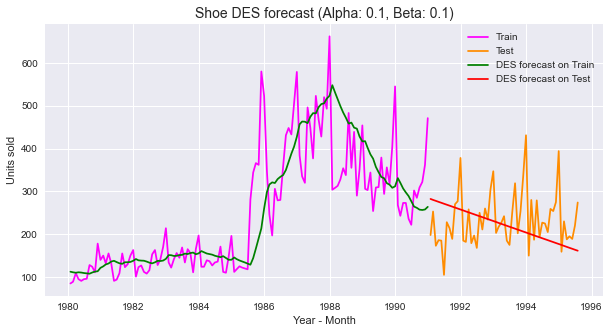

In [108]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(DES_test['Shoe_Sales'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_shoe', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_shoe', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Shoe DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

In [109]:
model_DES_shoe_autofit = model_DES_shoe.fit(optimized=True,use_brute=True)


In [110]:
model_DES_shoe_autofit.params


{'smoothing_level': 0.5943447461720326,
 'smoothing_trend': 0.0010329154212505437,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 84.98982017230469,
 'initial_trend': 2.324449420763351,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [111]:
alpha = model_DES_shoe_autofit.params['smoothing_level']
beta = model_DES_shoe_autofit.params['smoothing_trend']
alpha_6_2 = alpha
beta_6_2 = beta

In [112]:
DES_train['predict_shoe',alpha,beta] = model_DES_shoe_autofit.fittedvalues

In [113]:
DES_test['predict_shoe',alpha,beta] = model_DES_shoe_autofit.forecast(len(test['Shoe_Sales']))

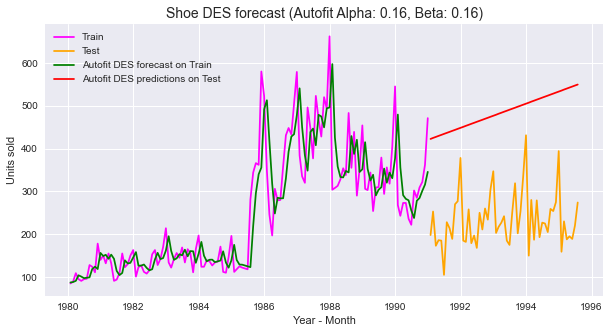

In [114]:
plt.figure(figsize=(10,5))
plt.plot(DES_train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(DES_test['Shoe_Sales'], label='Test', color = 'orange')

plt.plot(DES_train['predict_shoe',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_shoe',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Shoe DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best')

In [115]:
rmse_shoe_model6_train = metrics.mean_squared_error(DES_train['Shoe_Sales'],DES_train['predict_shoe',alpha,beta],squared=False)
mape_shoe_model6_train = MAPE(DES_train['Shoe_Sales'],DES_train['predict_shoe',alpha,beta])
        
rmse_shoe_model6_test = metrics.mean_squared_error(DES_test['Shoe_Sales'],DES_test['predict_shoe',alpha,beta],squared=False)
mape_shoe_model6_test = MAPE(DES_test['Shoe_Sales'],DES_test['predict_shoe',alpha,beta])
        
resultsDf_6_shoe = resultsDf_6_shoe.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_shoe_model6_train
                                      ,'Train MAPE': mape_shoe_model6_train,'Test RMSE':rmse_shoe_model6_test
                                      ,'Test MAPE':mape_shoe_model6_test}, ignore_index=True)

In [116]:
resultsDf_6_shoe.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0     0.1   0.1   86.606563       23.19   76.884339      25.23
10    0.2   0.1   79.155470       21.65  163.808760      65.22
1     0.1   0.2   84.427567       22.20  209.883109      82.52
2     0.1   0.3   84.183322       22.26  225.100420      88.88
3     0.1   0.4   86.094141       23.03  229.327873      90.10

In [117]:
resultsDf_6_shoe.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0     0.1   0.1   86.606563       23.19   76.884339      25.23
10    0.2   0.1   79.155470       21.65  163.808760      65.22
1     0.1   0.2   84.427567       22.20  209.883109      82.52
2     0.1   0.3   84.183322       22.26  225.100420      88.88
3     0.1   0.4   86.094141       23.03  229.327873      90.10

f1) Model Evaluation - Test Data

In [118]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_shoe['Test RMSE'][100],resultsDf_6_shoe['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_shoe['Test MAPE'][100],resultsDf_6_shoe['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.16, Beta 0.16','DES Alpha 0.10, Beta 0.10'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_6_1])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime           266.276472     110.08
NaiveModel                 245.121306     101.47
SimpleAverage               63.984570      21.86
2 point TMA                 45.948736      14.32
4 point TMA                 57.872686      19.48
6 point TMA                 63.456893      22.38
9 point TMA                 67.723648      23.33
SES Alpha 0.01             196.404851      79.92
DES Alpha 0.16, Beta 0.16  260.912068     107.87
DES Alpha 0.10, Beta 0.10   76.884339      25.23

(G) Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [119]:
TES_train = train.copy()
TES_test = test.copy()

In [120]:
model_TES_2 = ExponentialSmoothing(TES_train['Shoe_Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [121]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})


In [122]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_shoe',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_shoe',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Shoe_Sales']))
        
            rmse_shoe_model7_train = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict_shoe',i,j,k],squared=False)
            mape_shoe_model7_train = MAPE(TES_train['Shoe_Sales'],TES_train['predict_shoe',i,j,k])
        
            rmse_shoe_model7_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_shoe',i,j,k],squared=False)
            mape_shoe_model7_test = MAPE(TES_test['Shoe_Sales'],TES_test['predict_shoe',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_shoe_model7_train
                                      ,'Train MAPE': mape_shoe_model7_train,'Test RMSE':rmse_shoe_model7_test
                                      ,'Test MAPE': mape_shoe_model7_test}, ignore_index=True)

In [123]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
51     0.1   0.6    0.2   72.060173       20.35  41.314913      14.09
91     0.1   1.0    0.2   97.918265       26.35  43.561646      15.57
44     0.1   0.5    0.5   93.405279       22.97  43.842853      16.05
37     0.1   0.4    0.8  119.035207       28.56  45.137693      15.60
113    0.2   0.2    0.4   66.274224       17.19  47.005073      16.55

In [124]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
51    0.1   0.6    0.2   72.060173       20.35  41.314913      14.09
91    0.1   1.0    0.2   97.918265       26.35  43.561646      15.57
37    0.1   0.4    0.8  119.035207       28.56  45.137693      15.60
44    0.1   0.5    0.5   93.405279       22.97  43.842853      16.05
29    0.1   0.3    1.0  126.785881       34.42  47.641763      16.35

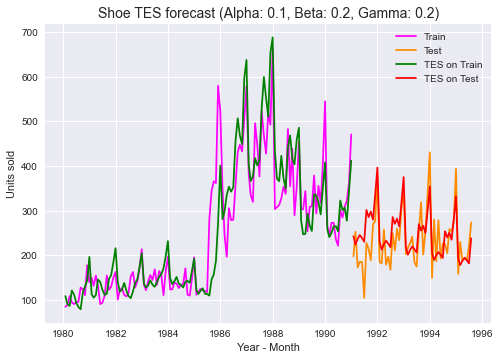

In [125]:
plt.plot(TES_train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(TES_test['Shoe_Sales'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_shoe', 0.1, 0.2, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_shoe', 0.1, 0.2, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Shoe TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best')

In [126]:
model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [127]:
model_TES_autofit.params

{'smoothing_level': 0.5635694817051221,
 'smoothing_trend': 0.00018206584339535296,
 'smoothing_seasonal': 0.21575218889337802,
 'damping_trend': nan,
 'initial_level': 208.8666634316522,
 'initial_trend': 0.03428719069771693,
 'initial_seasons': array([0.53483838, 0.51324388, 0.63474285, 0.71374033, 0.63545006,
        0.55063309, 0.59276757, 0.78703368, 0.87502284, 0.74326272,
        0.89727849, 0.95721449]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [128]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [129]:
TES_train['predict_shoe',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_shoe',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Shoe_Sales']))

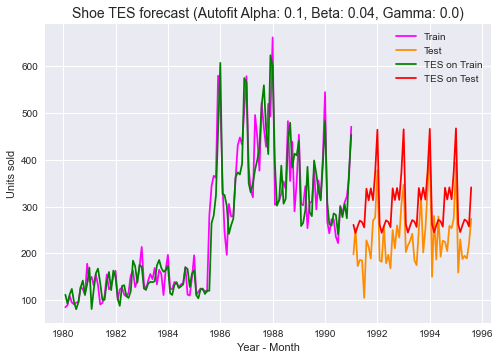

In [130]:
plt.plot(TES_train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(TES_test['Shoe_Sales'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_shoe',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_shoe',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Shoe TES forecast (Autofit Alpha: 0.1, Beta: 0.04, Gamma: 0.0)', fontsize=14)

plt.legend(loc='best')

In [131]:
rmse_shoe_model7_train = metrics.mean_squared_error(TES_train['Shoe_Sales'],TES_train['predict_shoe',alpha,beta,gamma],squared=False)
mape_shoe_model7_train = MAPE(TES_train['Shoe_Sales'],TES_train['predict_shoe',alpha,beta,gamma])
        
rmse_shoe_model7_test = metrics.mean_squared_error(TES_test['Shoe_Sales'],TES_test['predict_shoe',alpha,beta,gamma],squared=False)
mape_shoe_model7_test = MAPE(TES_test['Shoe_Sales'],TES_test['predict_shoe',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_shoe_model7_train
                                      ,'Train MAPE': mape_shoe_model7_train,'Test RMSE':rmse_shoe_model7_test
                                      ,'Test MAPE': mape_shoe_model7_test}, ignore_index=True)

In [132]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
51     0.1   0.6    0.2   72.060173       20.35  41.314913      14.09
91     0.1   1.0    0.2   97.918265       26.35  43.561646      15.57
44     0.1   0.5    0.5   93.405279       22.97  43.842853      16.05
37     0.1   0.4    0.8  119.035207       28.56  45.137693      15.60
113    0.2   0.2    0.4   66.274224       17.19  47.005073      16.55

G1) Model Evaluation - Test Data

In [133]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.2','TES Alpha 0.11, Beta 0.05, Gamma 0.00'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_7_ro])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       266.276472     110.08
NaiveModel                             245.121306     101.47
SimpleAverage                           63.984570      21.86
2 point TMA                             45.948736      14.32
4 point TMA                             57.872686      19.48
6 point TMA                             63.456893      22.38
9 point TMA                             67.723648      23.33
SES Alpha 0.01                         196.404851      79.92
DES Alpha 0.16, Beta 0.16              260.912068     107.87
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14

In [134]:
shoe_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
2 point TMA                             45.948736      14.32
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
4 point TMA                             57.872686      19.48
6 point TMA                             63.456893      22.38
SimpleAverage                           63.984570      21.86
9 point TMA                             67.723648      23.33
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14
SES Alpha 0.01                         196.404851      79.92
NaiveModel                             245.121306     101.47
DES Alpha 0.16, Beta 0.16              260.912068     107.87
RegressionOnTime                       266.276472     110.08

# Ploting all above models

Text(0.5, 1.0, 'Shoe : Forecast Vs Actual Test Data')

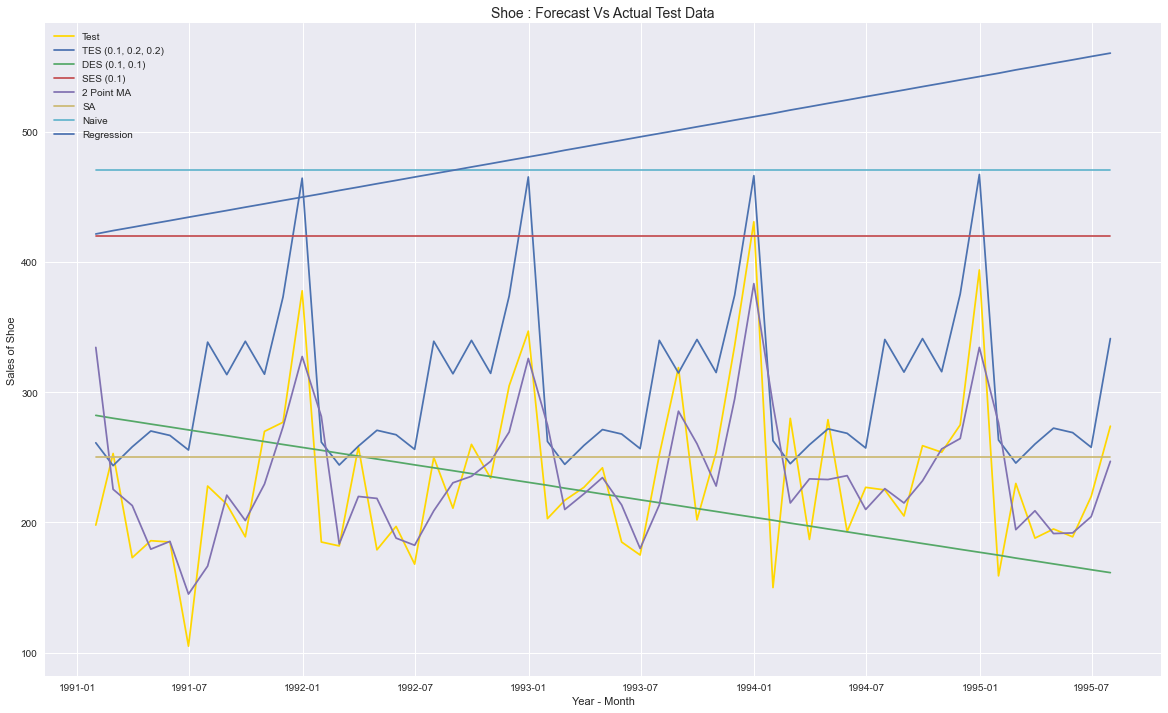

In [135]:
plt.figure(figsize=(20,12))


plt.plot(TES_test['Shoe_Sales'], label='Test', color = 'gold')
#TES
plt.plot(TES_test['predict_shoe',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.2)')
#DES
plt.plot(DES_test['predict_shoe',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_shoe'],  label='SES (0.1)')
#MA
plt.plot(trailing_MovingAverage_test['shoe_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_shoe'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Shoe')
plt.title('Shoe : Forecast Vs Actual Test Data', fontsize=14)

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [136]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

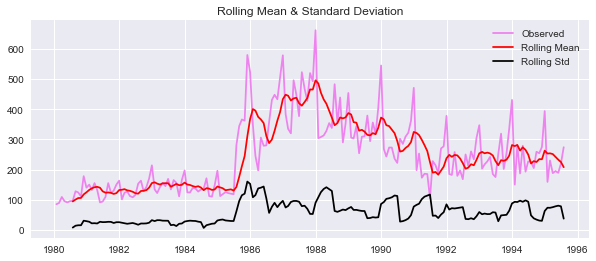

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [137]:
plt.figure(figsize=(10,4))
test_stationarity(df_shoe['Shoe_Sales'], 'violet')

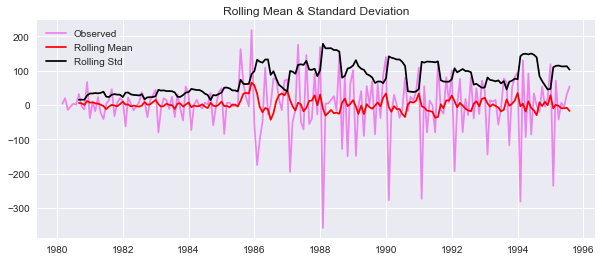

Results of Dickey-Fuller Test:
Test Statistic                  -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [138]:
plt.figure(figsize=(10,4))
test_stationarity(df_shoe['Shoe_Sales'].diff().dropna(), 'violet')

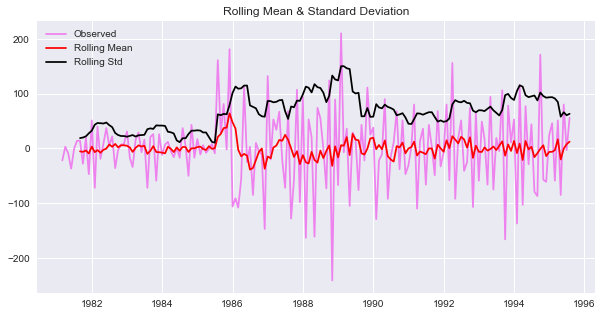

Results of Dickey-Fuller Test:
Test Statistic                  -5.278420
p-value                          0.000006
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [139]:
plt.figure(figsize=(10,5))
test_stationarity((df_shoe['Shoe_Sales'].diff(12).dropna()).diff().dropna(), 'violet')

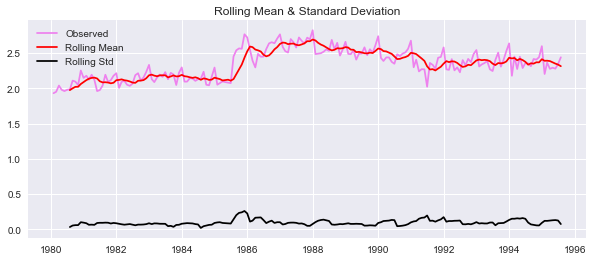

Results of Dickey-Fuller Test:
Test Statistic                  -1.647786
p-value                          0.458195
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [140]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df_shoe['Shoe_Sales']), 'violet')

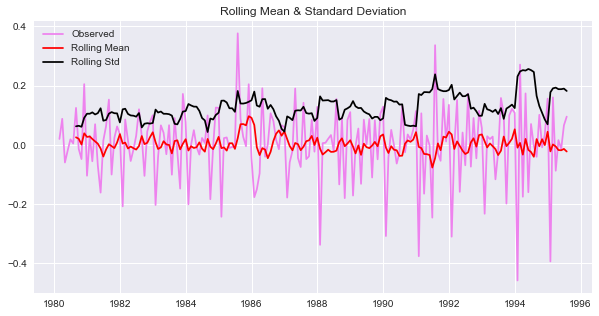

Results of Dickey-Fuller Test:
Test Statistic                  -3.476300
p-value                          0.008617
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [141]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df_shoe['Shoe_Sales']).diff().dropna(), 'violet')

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [142]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

In [143]:
import itertools
p = q = range(0,4)
d = range(1,2)
D = range(1,2)


pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [144]:
SARIMA_AIC_shoe = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_shoe

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [145]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_shoe = sm.tsa.statespace.SARIMAX(SARIMA_train['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_shoe = SARIMA_model_shoe.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_shoe.aic))
        SARIMA_AIC_shoe = SARIMA_AIC_shoe.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoe.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1333.696759012104
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:1183.9975289909166
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:1059.9877050238479
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3618.759438131383
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:1206.3241182814563
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:1185.825050061588
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:1061.6552599134998
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3463.1415302655837
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:1070.0686080928554
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:1071.5807547238796
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:1062.1690097939197
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:1998.1435538173707
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:946.4144644436473
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:947.5836694760089
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:949.2139794681751
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:2703.8674080668325
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1309.0047292935083
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:1161.181697643660

In [146]:
auto_SARIMA_shoe = sm.tsa.statespace.SARIMAX(SARIMA_train['Shoe_Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_shoe = auto_SARIMA_shoe.fit(maxiter=1000)
print(results_auto_SARIMA_shoe.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -445.663
Date:                            Mon, 21 Mar 2022   AIC                            909.326
Time:                                    06:25:45   BIC                            930.765
Sample:                                         0   HQIC                           917.921
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3794      0.263      1.441      0.150      -0.137       0.895
ar.L2          0.2664      0.186   

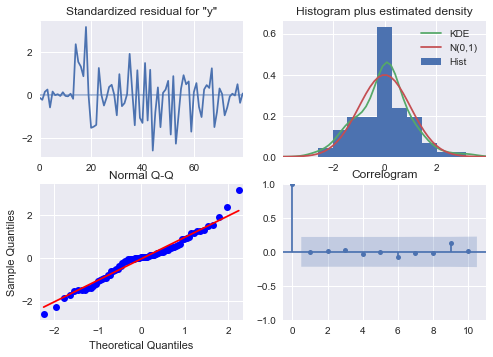

In [147]:
results_auto_SARIMA_shoe.plot_diagnostics()
plt.show()

In [148]:
pred_dynamic = results_auto_SARIMA_shoe.get_prediction(dynamic=True, full_results=True)

In [149]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_shoe = results_auto_SARIMA_shoe.get_forecast(steps=len(SARIMA_test['Shoe_Sales']), alpha=0.05)

In [150]:
predicted_auto_SARIMA_shoe.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  253.868710  60.446277     135.396184     372.341237
1  234.019642  70.108846      96.608828     371.430455
2  245.479954  81.680832      85.388465     405.571444
3  266.603919  87.439950      95.224767     437.983072
4  251.789495  92.993765      69.525064     434.053927

In [151]:
shoe_forecasted = pred_dynamic.predicted_mean
SARIMA_test['shoe_auto_forecasted'] = predicted_auto_SARIMA_shoe.predicted_mean
SARIMA_test.head()

Shoe_Sales  shoe_auto_forecasted
Time_Stamp                                  
1991-01-31         198            253.868710
1991-02-28         253            234.019642
1991-03-31         173            245.479954
1991-04-30         186            266.603919
1991-05-31         185            251.789495

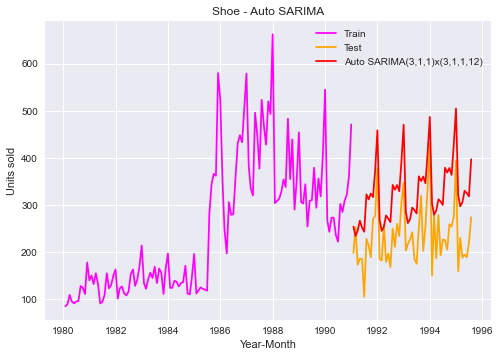

In [152]:
plt.plot(train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(test['Shoe_Sales'], label='Test', color = 'orange')

plt.plot(SARIMA_test['shoe_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Shoe - Auto SARIMA')
plt.legend(loc='best')

In [153]:
rmse_shoe_model8_test = metrics.mean_squared_error(test['Shoe_Sales'],SARIMA_test['shoe_auto_forecasted'],squared=False)
mape_shoe_model8_test = MAPE(test['Shoe_Sales'],SARIMA_test['shoe_auto_forecasted'])
print("For SARIMA forecast on the Shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model8_test, mape_shoe_model8_test))

For SARIMA forecast on the Shoe Testing Data:  RMSE is 100.215 and MAPE is 39.51


In [154]:
resultsDf_8_shoe1 = pd.DataFrame({'Test RMSE': [rmse_shoe_model8_test],'Test MAPE': [mape_shoe_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_8_shoe1])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       266.276472     110.08
NaiveModel                             245.121306     101.47
SimpleAverage                           63.984570      21.86
2 point TMA                             45.948736      14.32
4 point TMA                             57.872686      19.48
6 point TMA                             63.456893      22.38
9 point TMA                             67.723648      23.33
SES Alpha 0.01                         196.404851      79.92
DES Alpha 0.16, Beta 0.16              260.912068     107.87
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14
Auto SARIMA(3,1,1)x(3,1,1,12)          100.215039      39.51

In [155]:
#AUTO SARIMA ON LOG
shoe_log_train = np.log10(SARIMA_train['Shoe_Sales'])

In [156]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [157]:
SARIMA_AIC_shoe_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_shoe_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [158]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_shoe_log = sm.tsa.statespace.SARIMAX(shoe_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_shoe_log = SARIMA_model_shoe_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_shoe_log.aic))
        SARIMA_AIC_shoe_log = SARIMA_AIC_shoe_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_shoe_log.aic}, ignore_index=True)


SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:597.402610920303
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:421.8573517030904
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:294.41677876587994
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-98.40206568761283
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-79.76450395469865
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-61.32876004039555
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-101.97373819878823
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-100.26796720374287
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-96.71261960662756
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-80.29245973563633
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-77.87512880531939
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-63.55103578548882
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-82.69562290216851
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-81.16883851467978
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-94.85594502484378
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-62.08486939835181
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-60.16724549202438
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-57.36976239

In [159]:
SARIMA_AIC_shoe_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
169  (1, 1, 0)  (1, 0, 1, 12) -247.512518
223  (2, 0, 0)  (1, 0, 1, 12) -246.881146
133  (1, 0, 1)  (1, 0, 1, 12) -245.068533
241  (2, 0, 1)  (1, 0, 1, 12) -244.347975
79   (0, 1, 1)  (1, 0, 1, 12) -243.574678

In [160]:
auto_SARIMA_shoe_log = sm.tsa.statespace.SARIMAX(shoe_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_shoe_log = auto_SARIMA_shoe_log.fit(maxiter=1000)
print(results_auto_SARIMA_shoe_log.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 123.875
Date:                              Mon, 21 Mar 2022   AIC                           -239.750
Time:                                      06:32:00   BIC                           -228.633
Sample:                                  01-31-1980   HQIC                          -235.236
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8570      0.057     15.028      0.000       0.745       0.969
ar.S.L12       1.01

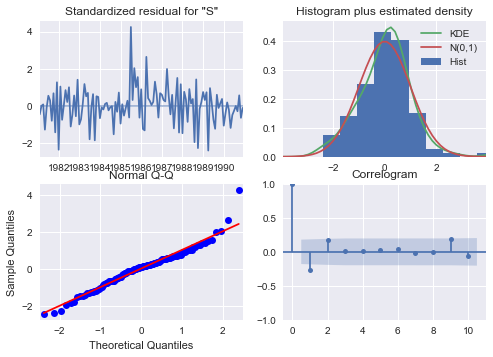

In [161]:
results_auto_SARIMA_shoe_log.plot_diagnostics()
plt.show()

In [162]:
pred_dynamic = results_auto_SARIMA_shoe_log.get_prediction(dynamic=True, full_results=True)

In [163]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_shoe_log = results_auto_SARIMA_shoe_log.get_forecast(steps=len(SARIMA_test['Shoe_Sales']), alpha=0.05)

In [164]:
predicted_auto_SARIMA_shoe_log.summary_frame(alpha=0.05).head()

Shoe_Sales      mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  2.432971  0.083023       2.270249       2.595692
1991-02-28  2.417098  0.109338       2.202799       2.631397
1991-03-31  2.458801  0.125191       2.213430       2.704172
1991-04-30  2.472262  0.135660       2.206373       2.738152
1991-05-31  2.472799  0.142862       2.192795       2.752803

In [165]:
# Extract the predicted and true values of our time series
shoe_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['shoe_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_shoe_log.predicted_mean)
SARIMA_test.head()

Shoe_Sales  shoe_auto_forecasted  shoe_log_auto_forecasted
Time_Stamp                                                            
1991-01-31         198            253.868710                271.000846
1991-02-28         253            234.019642                261.274997
1991-03-31         173            245.479954                287.607867
1991-04-30         186            266.603919                296.662221
1991-05-31         185            251.789495                297.029181

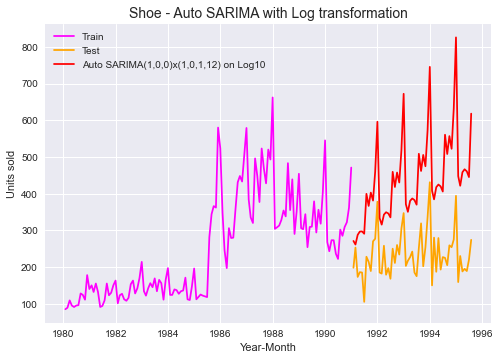

In [166]:
plt.plot(train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(test['Shoe_Sales'], label='Test', color = 'orange')

plt.plot(SARIMA_test['shoe_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')

plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Shoe - Auto SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [167]:
rmse_shoe_model8_test = metrics.mean_squared_error(test['Shoe_Sales'],SARIMA_test['shoe_log_auto_forecasted'],squared=False)
mape_shoe_model8_test = MAPE(test['Shoe_Sales'],SARIMA_test['shoe_log_auto_forecasted'])
print("For SARIMA forecast on the Shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model8_test, mape_shoe_model8_test))

For SARIMA forecast on the Shoe Testing Data:  RMSE is 220.902 and MAPE is 88.05


In [168]:
resultsDf_8_shoe2 = pd.DataFrame({'Test RMSE': [rmse_shoe_model8_test],'Test MAPE': [mape_shoe_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_8_shoe2])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       266.276472     110.08
NaiveModel                             245.121306     101.47
SimpleAverage                           63.984570      21.86
2 point TMA                             45.948736      14.32
4 point TMA                             57.872686      19.48
6 point TMA                             63.456893      22.38
9 point TMA                             67.723648      23.33
SES Alpha 0.01                         196.404851      79.92
DES Alpha 0.16, Beta 0.16              260.912068     107.87
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14
Auto SARIMA(3,1,1)x(3,1,1,12)          100.215039      39.51
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    220.902336      88.05

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

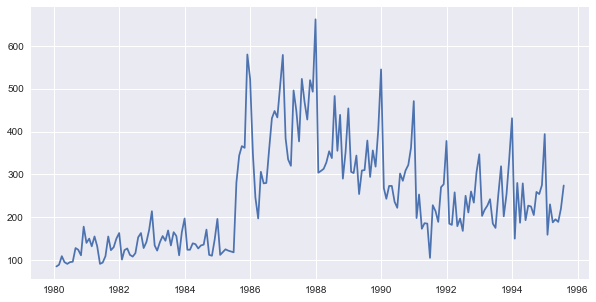

In [169]:
plt.figure(figsize=(10,5))
plt.plot(df_shoe['Shoe_Sales'])

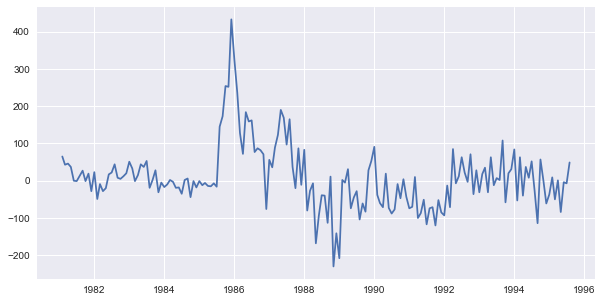

In [170]:
plt.figure(figsize=(10,5))
plt.plot(df_shoe['Shoe_Sales'].diff(12).dropna())

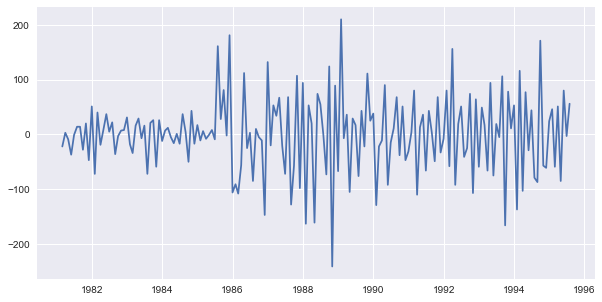

In [171]:
plt.figure(figsize=(10,5))
plt.plot((df_shoe['Shoe_Sales'].diff(12).dropna()).diff().dropna())

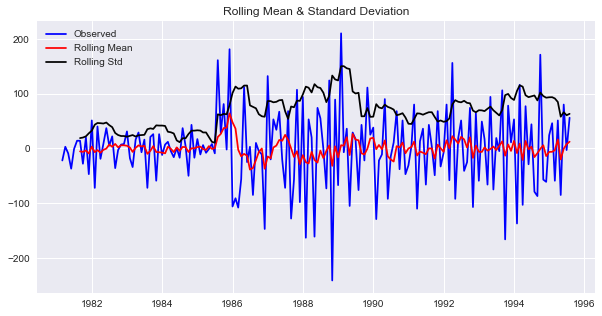

Results of Dickey-Fuller Test:
Test Statistic                  -5.278420
p-value                          0.000006
#Lags Used                      12.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64 



In [172]:
plt.figure(figsize=(10,5))
test_stationarity((df_shoe['Shoe_Sales'].diff(12).dropna()).diff().dropna(),'blue')

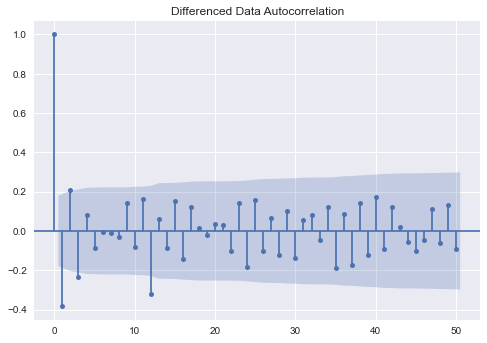

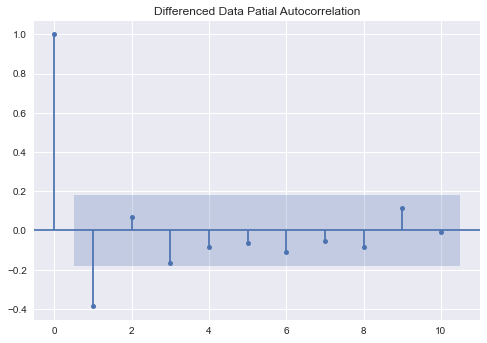

In [173]:
plot_acf((SARIMA_train['Shoe_Sales'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Shoe_Sales'].diff(12).dropna()).diff().dropna(),lags=10,title='Differenced Data Patial Autocorrelation')
plt.show()

In [174]:
manual_SARIMA_shoe = sm.tsa.statespace.SARIMAX(train['Shoe_Sales'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_shoe = manual_SARIMA_shoe.fit(maxiter=1000)
print(results_manual_SARIMA_shoe.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -506.684
Date:                            Mon, 21 Mar 2022   AIC                           1031.369
Time:                                    06:32:15   BIC                           1054.065
Sample:                                         0   HQIC                          1040.529
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5550      0.193     -2.869      0.004      -0.934      -0.176
ar.L2          0.6102      0.283   

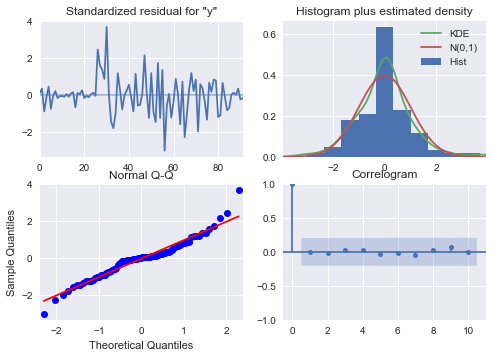

In [175]:
results_manual_SARIMA_shoe.plot_diagnostics()
plt.show()

In [176]:
pred_dynamic = results_manual_SARIMA_shoe.get_prediction(dynamic=True, full_results=True)

In [177]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_shoe = results_manual_SARIMA_shoe.get_forecast(steps=len(test['Shoe_Sales']), alpha=0.05)

In [178]:
predicted_manual_SARIMA_shoe.summary_frame(alpha=0.05).head()

y        mean    mean_se  mean_ci_lower  mean_ci_upper
0  233.975902  57.993928     120.309891     347.641912
1  216.751382  69.337325      80.852721     352.650042
2  232.696088  80.253652      75.401821     389.990355
3  248.398098  86.924473      78.029262     418.766933
4  232.252148  90.556546      54.764579     409.739717

In [179]:
shoe_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['shoe_manual_forecasted'] = predicted_manual_SARIMA_shoe.predicted_mean
SARIMA_test.head()

Shoe_Sales  shoe_auto_forecasted  shoe_log_auto_forecasted  \
Time_Stamp                                                               
1991-01-31         198            253.868710                271.000846   
1991-02-28         253            234.019642                261.274997   
1991-03-31         173            245.479954                287.607867   
1991-04-30         186            266.603919                296.662221   
1991-05-31         185            251.789495                297.029181   

            shoe_manual_forecasted  
Time_Stamp                          
1991-01-31              233.975902  
1991-02-28              216.751382  
1991-03-31              232.696088  
1991-04-30              248.398098  
1991-05-31              232.252148

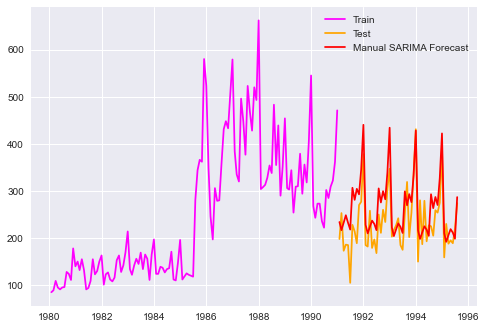

In [180]:
plt.plot(train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(test['Shoe_Sales'], label='Test', color = 'orange')

plt.plot(SARIMA_test['shoe_manual_forecasted'], color='red', label='Manual SARIMA Forecast')

plt.legend(loc='best')

In [181]:
rmse_shoe_model8_test = metrics.mean_squared_error(test['Shoe_Sales'],SARIMA_test['shoe_manual_forecasted'],squared=False)
mape_shoe_model8_test = MAPE(test['Shoe_Sales'],SARIMA_test['shoe_manual_forecasted'])
print("For SARIMA forecast on the Shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model8_test, mape_shoe_model8_test))

For SARIMA forecast on the Shoe Testing Data:  RMSE is 50.477 and MAPE is 18.65


In [182]:
resultsDf_8_shoe3 = pd.DataFrame({'Test RMSE': [rmse_shoe_model8_test],'Test MAPE': [mape_shoe_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,1,12)'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_8_shoe3])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       266.276472     110.08
NaiveModel                             245.121306     101.47
SimpleAverage                           63.984570      21.86
2 point TMA                             45.948736      14.32
4 point TMA                             57.872686      19.48
6 point TMA                             63.456893      22.38
9 point TMA                             67.723648      23.33
SES Alpha 0.01                         196.404851      79.92
DES Alpha 0.16, Beta 0.16              260.912068     107.87
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14
Auto SARIMA(3,1,1)x(3,1,1,12)          100.215039      39.51
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    220.902336      88.05
Manual SARIMA(4,1,2)x(0,1,1,12)         50.476810      18.65

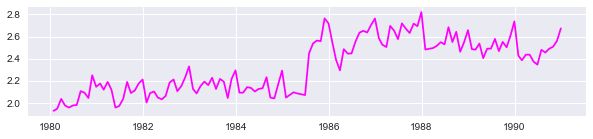

In [183]:
#Manual SARIMA on Log
plt.figure(figsize=(10,2))
plt.plot(shoe_log_train, color='magenta')

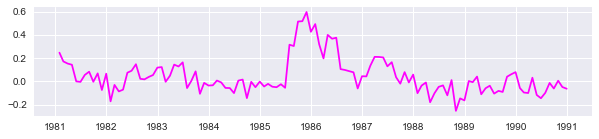

In [184]:
plt.figure(figsize=(10,2))
plt.plot(shoe_log_train.diff(12).dropna(), color='magenta')

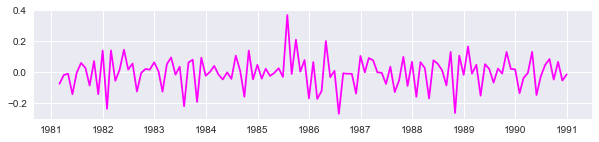

In [185]:
plt.figure(figsize=(10,2))
plt.plot((shoe_log_train.diff(12).dropna()).diff().dropna(), color='magenta')

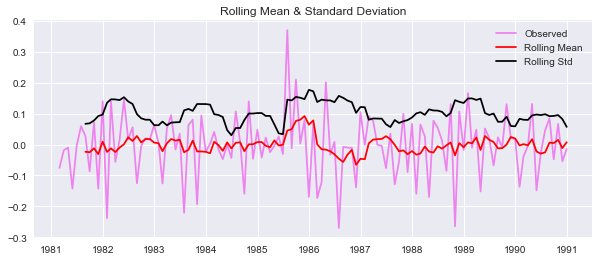

Results of Dickey-Fuller Test:
Test Statistic                -1.584697e+01
p-value                        9.546611e-29
#Lags Used                     0.000000e+00
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [186]:
plt.figure(figsize=(10,4))
test_stationarity((shoe_log_train.diff(12).dropna()).diff().dropna(), 'violet')

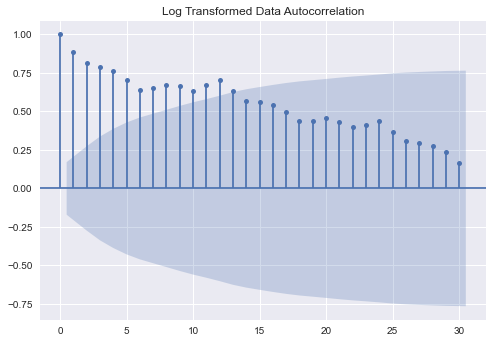

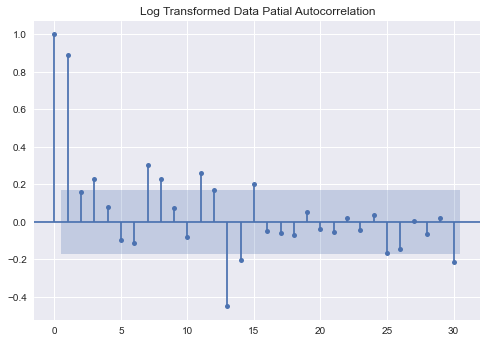

In [187]:
plot_acf(shoe_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(shoe_log_train,lags=30,title='Log Transformed Data Patial Autocorrelation')
plt.show()

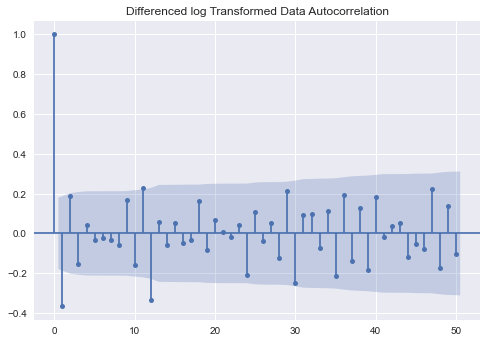

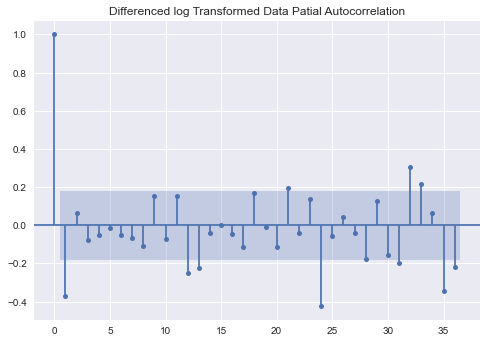

In [188]:
plot_acf((shoe_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((shoe_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Patial Autocorrelation')
plt.show()

In [189]:
manual_SARIMA_shoe_log = sm.tsa.statespace.SARIMAX(shoe_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_shoe_log = manual_SARIMA_shoe_log.fit(maxiter=1000)
print(results_manual_SARIMA_shoe_log.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 114.057
Date:                            Mon, 21 Mar 2022   AIC                           -214.114
Time:                                    06:32:31   BIC                           -195.536
Sample:                                01-31-1980   HQIC                          -206.586
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4212      0.280      1.506      0.132      -0.127       0.969
ar.L2          0.2144      0.138   

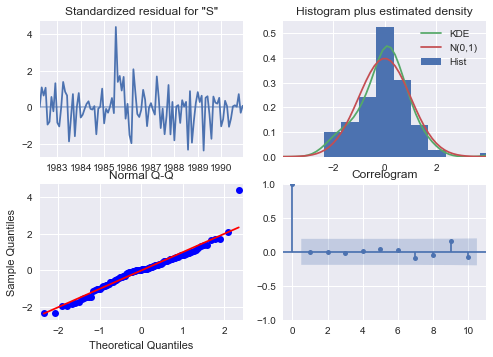

In [190]:
results_manual_SARIMA_shoe_log.plot_diagnostics()
plt.show()

In [191]:
pred_dynamic = results_manual_SARIMA_shoe_log.get_prediction(dynamic=True, full_results=True)

In [192]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_shoe_log = results_manual_SARIMA_shoe_log.get_forecast(steps=len(test['Shoe_Sales']), alpha=0.1)

In [193]:
predicted_manual_SARIMA_shoe_log.summary_frame(alpha=0.05).head()

Shoe_Sales      mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  2.428179  0.079974       2.271432       2.584926
1991-02-28  2.393825  0.096264       2.205151       2.582498
1991-03-31  2.419737  0.113227       2.197817       2.641658
1991-04-30  2.424531  0.126622       2.176357       2.672706
1991-05-31  2.413671  0.135330       2.148430       2.678912

In [194]:
SARIMA_test['shoe_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_shoe_log.predicted_mean)
SARIMA_test.head()

Shoe_Sales  shoe_auto_forecasted  shoe_log_auto_forecasted  \
Time_Stamp                                                               
1991-01-31         198            253.868710                271.000846   
1991-02-28         253            234.019642                261.274997   
1991-03-31         173            245.479954                287.607867   
1991-04-30         186            266.603919                296.662221   
1991-05-31         185            251.789495                297.029181   

            shoe_manual_forecasted  shoe_log_manual_forecasted  
Time_Stamp                                                      
1991-01-31              233.975902                  268.027348  
1991-02-28              216.751382                  247.642158  
1991-03-31              232.696088                  262.867754  
1991-04-30              248.398098                  265.785479  
1991-05-31              232.252148                  259.221692

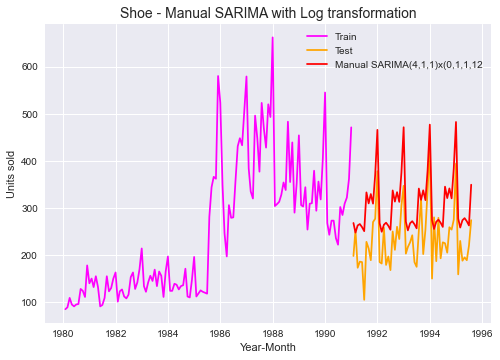

In [195]:
plt.plot(train['Shoe_Sales'], label='Train', color = 'magenta')
plt.plot(test['Shoe_Sales'], label='Test', color = 'orange')

plt.plot(SARIMA_test['shoe_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year-Month')
plt.ylabel('Units sold')
plt.title('Shoe - Manual SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best')

In [196]:
rmse_shoe_model8_test = metrics.mean_squared_error(test['Shoe_Sales'],SARIMA_test['shoe_log_manual_forecasted'],squared=False)
mape_shoe_model8_test = MAPE(test['Shoe_Sales'],SARIMA_test['shoe_log_manual_forecasted'])
print("For SARIMA forecast on the shoe Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_model8_test, mape_shoe_model8_test))

For SARIMA forecast on the shoe Testing Data:  RMSE is 82.297 and MAPE is 32.00


# 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [197]:
resultsDf_8_shoe4 = pd.DataFrame({'Test RMSE': [rmse_shoe_model8_test],'Test MAPE': [mape_shoe_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])

shoe_resultsDf = pd.concat([shoe_resultsDf, resultsDf_8_shoe4])
shoe_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       266.276472     110.08
NaiveModel                             245.121306     101.47
SimpleAverage                           63.984570      21.86
2 point TMA                             45.948736      14.32
4 point TMA                             57.872686      19.48
6 point TMA                             63.456893      22.38
9 point TMA                             67.723648      23.33
SES Alpha 0.01                         196.404851      79.92
DES Alpha 0.16, Beta 0.16              260.912068     107.87
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14
Auto SARIMA(3,1,1)x(3,1,1,12)          100.215039      39.51
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    220.902336      88.05
Manual SARIMA(4,1,2)x(0,1,1,12)         50.476810      18.65
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10   82.297030      32.00

In [198]:
shoe_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
2 point TMA                             45.948736      14.32
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
Manual SARIMA(4,1,2)x(0,1,1,12)         50.476810      18.65
4 point TMA                             57.872686      19.48
6 point TMA                             63.456893      22.38
SimpleAverage                           63.984570      21.86
9 point TMA                             67.723648      23.33
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10   82.297030      32.00
Auto SARIMA(3,1,1)x(3,1,1,12)          100.215039      39.51
SES Alpha 0.01                         196.404851      79.92
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    220.902336      88.05
NaiveModel                             245.121306     101.47
DES Alpha 0.16, Beta 0.16              260.912068     107.87
RegressionOnTime                       266.276472     110.08

In [199]:
shoe_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
2 point TMA                             45.948736      14.32
TES Alpha 0.1, Beta 0.2, Gamma 0.2      47.202836      16.59
Manual SARIMA(4,1,2)x(0,1,1,12)         50.476810      18.65
4 point TMA                             57.872686      19.48
SimpleAverage                           63.984570      21.86
6 point TMA                             63.456893      22.38
9 point TMA                             67.723648      23.33
DES Alpha 0.10, Beta 0.10               76.884339      25.23
TES Alpha 0.11, Beta 0.05, Gamma 0.00   80.669370      31.14
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10   82.297030      32.00
Auto SARIMA(3,1,1)x(3,1,1,12)          100.215039      39.51
SES Alpha 0.01                         196.404851      79.92
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    220.902336      88.05
NaiveModel                             245.121306     101.47
DES Alpha 0.16, Beta 0.16              260.912068     107.87
RegressionOnTime                       266.276472     110.08

Plot all the forecast

Text(0.5, 1.0, 'SHOE : Forecast Vs Test Data')

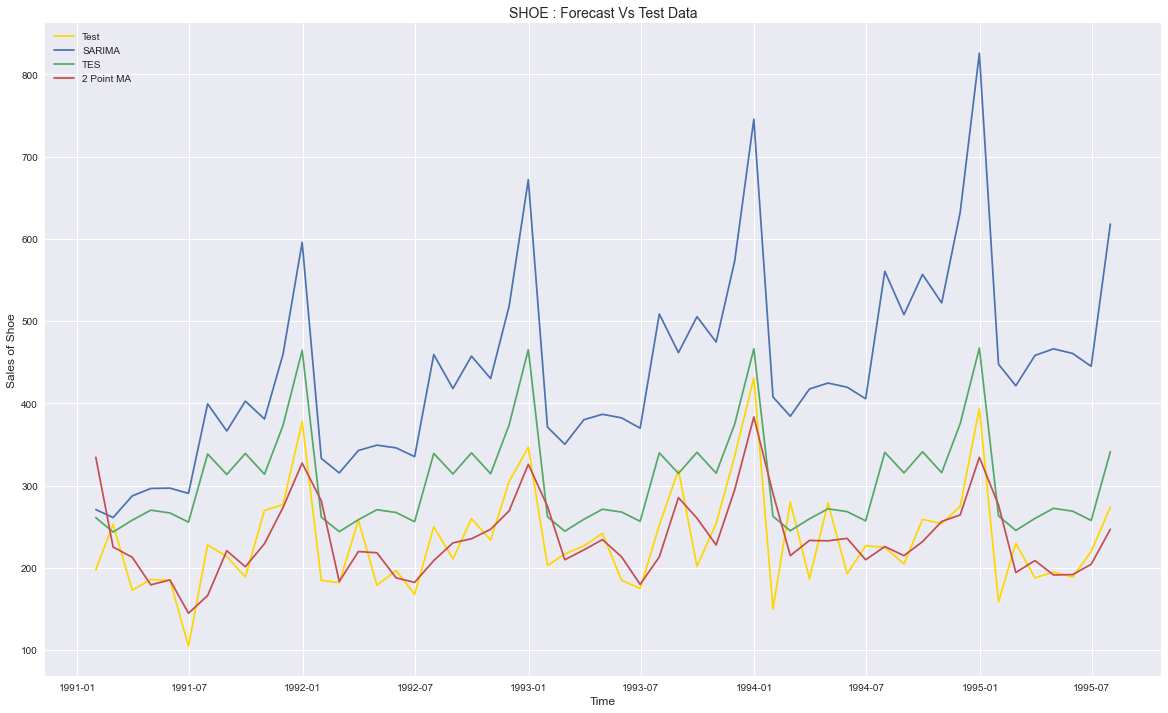

In [200]:
plt.figure(figsize=(20,12))

plt.plot(TES_test['Shoe_Sales'], label='Test', color = 'gold')
plt.plot(SARIMA_test['shoe_log_auto_forecasted'],  label='SARIMA')
plt.plot(TES_test['predict_shoe',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
plt.plot(trailing_MovingAverage_test['shoe_Trailing_2'],  label='2 Point MA')
plt.legend(loc='upper left')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Sales of Shoe',fontsize=12)
plt.title('SHOE : Forecast Vs Test Data', fontsize=14)

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Build model on all of the dataset using best model, which is TES

In [201]:
model_TES_shoe = ExponentialSmoothing(df_shoe['Shoe_Sales'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_shoe_fit = model_TES_shoe.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_shoe_forecast = model_TES_shoe_fit.forecast(steps=12)

In [202]:
rmse_shoe_tes_full = metrics.mean_squared_error(df_shoe['Shoe_Sales'],model_TES_shoe_fit.fittedvalues,squared=False)
mape_shoe_tes_full = MAPE(df_shoe['Shoe_Sales'],model_TES_shoe_fit.fittedvalues)
print("TES forecast on the Shoe Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_tes_full, mape_shoe_tes_full))

TES forecast on the Shoe Full Data:  RMSE is 59.910 and MAPE is 16.88


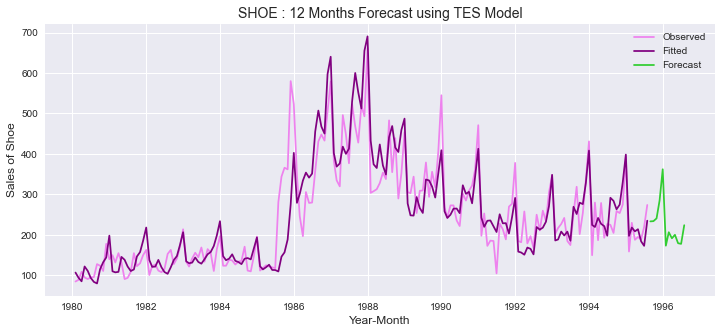

In [203]:
plt.figure(figsize=(12,5))

plt.plot(df_shoe['Shoe_Sales'], label='Observed', color = 'violet')
plt.plot(model_TES_shoe_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_shoe_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Shoe',fontsize=12)
plt.title('SHOE : 12 Months Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SHOE : 12 Months Forecast')

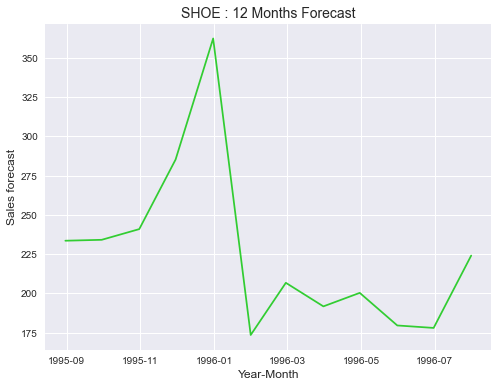

In [204]:
plt.figure(figsize=(8,6))
plt.plot(TES_shoe_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('SHOE : 12 Months Forecast', fontsize=14)

In [205]:
shoe_log_trans = np.log10(df_shoe['Shoe_Sales'])

In [206]:
shoe_full_data_model = sm.tsa.statespace.SARIMAX(df_shoe['Shoe_Sales'],
                                order= (4,1,1), #(1,0,0), 
                                seasonal_order= (0,1,1,12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_shoe = shoe_full_data_model.fit(maxiter=1000)
print(results_full_data_model_shoe.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -865.715
Date:                            Mon, 21 Mar 2022   AIC                           1745.430
Time:                                    06:32:47   BIC                           1766.957
Sample:                                01-31-1980   HQIC                          1754.171
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2450      0.203      1.204      0.228      -0.154       0.644
ar.L2          0.2726      0.129   

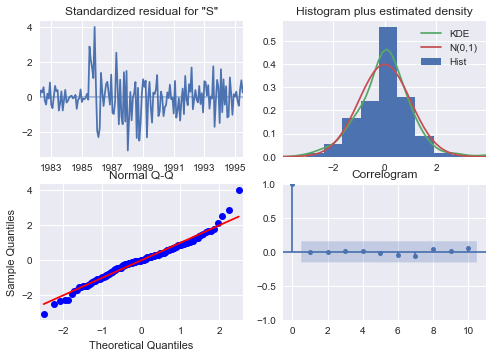

In [207]:
results_full_data_model_shoe.plot_diagnostics();

In [208]:
predicted_shoe_SARIMA_full_data = results_full_data_model_shoe.get_forecast(steps=12)
predicted_shoe_SARIMA_full_data.summary_frame(alpha=0.05).head()

Shoe_Sales        mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  264.678161  53.664811     159.497063     369.859258
1995-09-30  261.772026  59.631579     144.896279     378.647773
1995-10-31  268.038783  68.569521     133.644991     402.432575
1995-11-30  313.813816  73.255111     170.236437     457.391195
1995-12-31  410.054869  77.156548     258.830813     561.278925

In [209]:
rmse_shoe_sarima_full = metrics.mean_squared_error(df_shoe['Shoe_Sales'],results_full_data_model_shoe.fittedvalues,squared=False)
mape_shoe_sarima_full = MAPE(df_shoe['Shoe_Sales'],results_full_data_model_shoe.fittedvalues)

print("For SARIMA forecast on the Shoe Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_shoe_sarima_full, mape_shoe_sarima_full))

For SARIMA forecast on the Shoe Full Data:  RMSE is 51.196 and MAPE is 15.11


In [210]:
results_full_data_model_shoe.fittedvalues.head()

Time_Stamp
1980-01-31      0.000000
1980-02-29     91.942016
1980-03-31     97.995248
1980-04-30    112.960265
1980-05-31     95.553393
dtype: float64

In [211]:
predicted_spark_SARIMA_full_data = results_full_data_model_shoe.get_forecast(steps=12)

In [212]:
pred_full_manual_SARIMA_date = predicted_spark_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

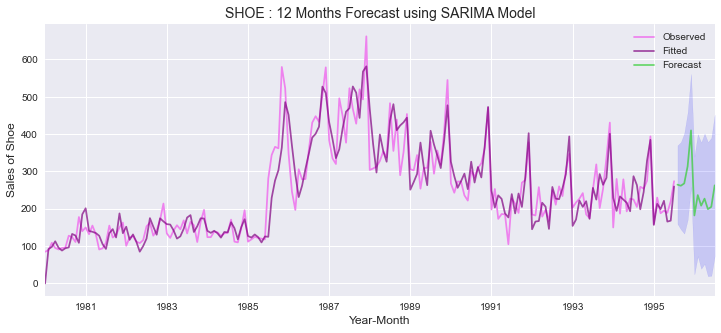

In [213]:
plt.figure(figsize=(12,5))

axis = df_shoe['Shoe_Sales'].plot(label='Observed', color = 'violet')


results_full_data_model_shoe.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Shoe',fontsize=12)
plt.title('SHOE : 12 Months Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'SHOE : 12 Months Forecast')

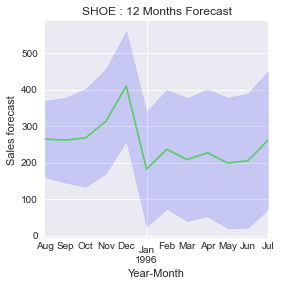

In [214]:
plt.figure(figsize=(4,4))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SHOE : 12 Months Forecast', fontsize=12)

In [215]:
forecast = pd.DataFrame({'Shoe_Sales':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

Shoe_Sales
1995-08-31      264.68
1995-09-30      261.77
1995-10-31      268.04
1995-11-30      313.81
1995-12-31      410.05
1996-01-31      182.11
1996-02-29      236.68
1996-03-31      208.41
1996-04-30      227.20
1996-05-31      199.06
1996-06-30      205.28
1996-07-31      262.73

In [216]:
forecast.describe()

Shoe_Sales
count   12.000000
mean   253.318333
std     61.811971
min    182.110000
25%    207.627500
50%    249.225000
75%    265.520000
max    410.050000